# ML Crash Course

Other names of x, y are:-

x==> "independent variables", "features", "input variables", “regressors,“ “controlled variable,” “manipulated variable,” “explanatory variable,” “exposure variable” 

y==> "prediction variable","dependent variable", "response variable,” “regressand,” “measured variable,” “observed variable,” “responding variable,” “explained variable,” “outcome variable,” “experimental variable,” and/or “output variable.”

**Regression** is the statistical method that attempts to determine the strength and the relation between the independent and dependent variables. 

##r2_score varies between 0 and 100 percent. its values range between 0.0 to 1.
value of 1 is highly favourable however greater than 0.8 is also good


..........................................................................................................................................................................................

The **least squares method** is a statistical procedure to find the best fit for a set of data points by minimizing the sum of the offsets or residuals of points from the plotted curve.
Least squares regression is used to predict the behavior of dependent variables.
The least squares method provides the overall rationale for the placement of the line of best fit among the data points being studied.

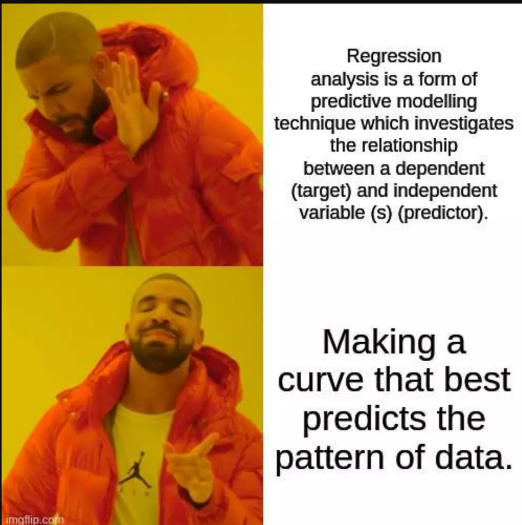

# Simple Linear Regression

1- SLR tells relationship between two variables,both continuous, (one dependent and other indpendent) and this info about their relationship later can be used for predictions.

2-simple linear regression equation: **y=mx+c** 

3- y=b1x+ b0 

b0 and b1 are known as the **regression beta coefficients or parameters**:-
b0 is the intercept of the regression line; that is the predicted value when x = 0.
b1 is the slope of the regression line.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#Importing_dataset

df=pd.read_csv(r"datasets/ML_salary_CSV.csv")
# print("data to use is: \n", df.head())

#Step1:Data cleaning and wrangling 
##already clean data so skipping it for now

x=df[["YearsExperience"]]
y=df['Salary']


# Step2: Splitting dataset into training data and testing data
#(Usually 20% data is assigned for testing and 80% data is assigned for training)

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=0)

# STEP 3
model= LinearRegression().fit(x_train,y_train)
# # model
# # model.predict(x)
# model.predict(x_test)

model.predict([[30],[100],[2.5]])

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([306157.3529525 , 958037.61182355,  50061.53696745])

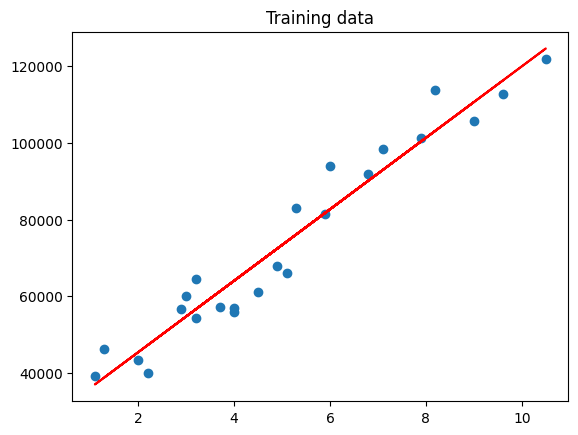

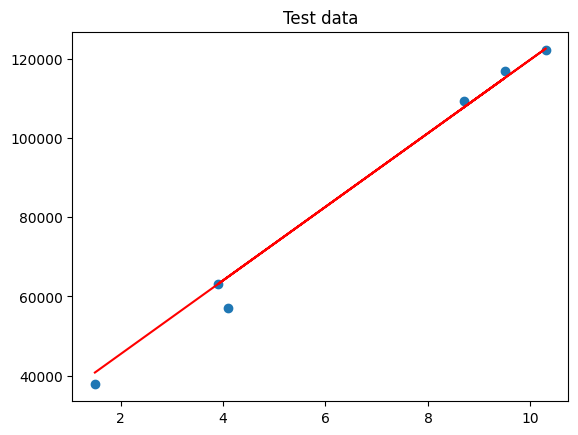

In [2]:
plt.scatter(x_train, y_train)
plt.plot(x_train, model.predict(x_train), color= "Red")
plt.title("Training data")
plt.show()
plt.scatter(x_test, y_test)
plt.plot(x_test, model.predict(x_test), color= "Red")
plt.title("Test data")
plt.show()

In [3]:
# Evaluation
print("training data predict score")
print(model.score(x_train, y_train))

print("test")

model.score(x_test, y_test)

training data predict score
0.9411949620562126
test


0.988169515729126

The double brackets `[[ ]]` you see in `x = df[["YearsExperience"]]` are used to ensure that the selected data forms a DataFrame rather than a Series, which is the result when single brackets `[ ]` are used. This distinction is significant in the context of scikit-learn and many other libraries that expect input in a specific format:

1. **DataFrame vs. Series**: In pandas, using single brackets with a column name, like `df["YearsExperience"]`, returns a Series. A Series is a one-dimensional array-like object capable of holding any data type. On the other hand, using double brackets, like `df[["YearsExperience"]]`, returns a DataFrame, which is a 2D labeled data structure with columns potentially of different types.

2. **Expectations of scikit-learn**: Most scikit-learn functions expect the features (`X`) to be presented as a 2D array-like structure. This is because even if there is only one feature, the model generally anticipates multiple features (each as its own column in a 2D array). Using a DataFrame ensures that the data maintains this 2D structure with both rows (samples) and columns (features), conforming to the expected input structure.

3. **Generalization**: Using double brackets is a good practice, especially in machine learning tasks, because it means your code will more easily generalize if you later decide to add more features to your model. You would simply add more column names to the list inside the double brackets without needing to adjust the data structure of your input variable `x`.

In summary, the double brackets ensure that `x` is treated as a DataFrame, which is the appropriate format for the fitting function of scikit-learn models, helping to prevent shape-related errors and maintaining consistency across different types of model training scenarios.

# Multiple Linear regression

jis mein aik say zayada variables ka comparison ho.Usually dependent variable is only one , while independent variabes are multiple.
Equation of Multiple Linear regression: **y= i1(x1) + i2(x2) + i3(x3) + b**
(where " i " is the coefficient and " b " is intercept)


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#Importing_dataset

df=pd.read_csv(r"datasets/ML_salary_CSV.csv")
# print("data to use is: \n", df.head())

#Step1:Data cleaning and wrangling 
##already clean data so skipping it for now

x=df[["YearsExperience", "distance", "age"]]
y=df['Salary']


# Step2: Splitting dataset into training data and testing data
#(Usually 20% data is assigned for testing and 80% data is assigned for training)

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=0)

# STEP 3
model= LinearRegression().fit(x_train,y_train)
# model

# to get values of coeffiencts i1,i2, i3 in multiple linear regression equation
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_ )

# print("Prediction of salary when 'age','distance','YearsExperience' are 31.1,77.75,1.1")

# based on the input x values of 'age','distance','YearsExperience' model will now range of salary

model.predict(x)
model.predict(x_train)

Intercept: 
 -6.20378818260737e+17
Coefficients: 
 [-2.06792939e+16 -1.38425908e+15  2.41399416e+16]


array([116352.,  64256.,  76288., 100352.,  53888.,  74496.,  56832.,
        68864., 103424.,  90112.,  38912., 124672.,  54784.,  47360.,
        81920.,  82688.,  61440.,  56832., 110720.,  45440.,  37120.,
        93056.,  72448.,  64256.])

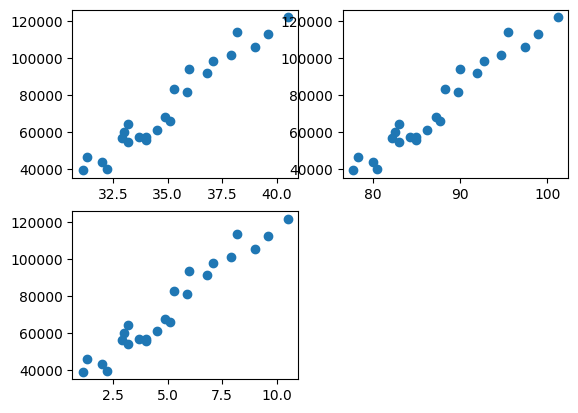

In [5]:
# plt.subplot enables us to plot mutliple graphs
# we produce scatter plots for salary(y variable) against each of our input variables
plt.subplot(2,2,1)
plt.scatter(x_train['age'],y_train)
plt.subplot(2,2,2)
plt.scatter(x_train['distance'],y_train)
plt.subplot(2,2,3)
plt.scatter(x_train['YearsExperience'],y_train)

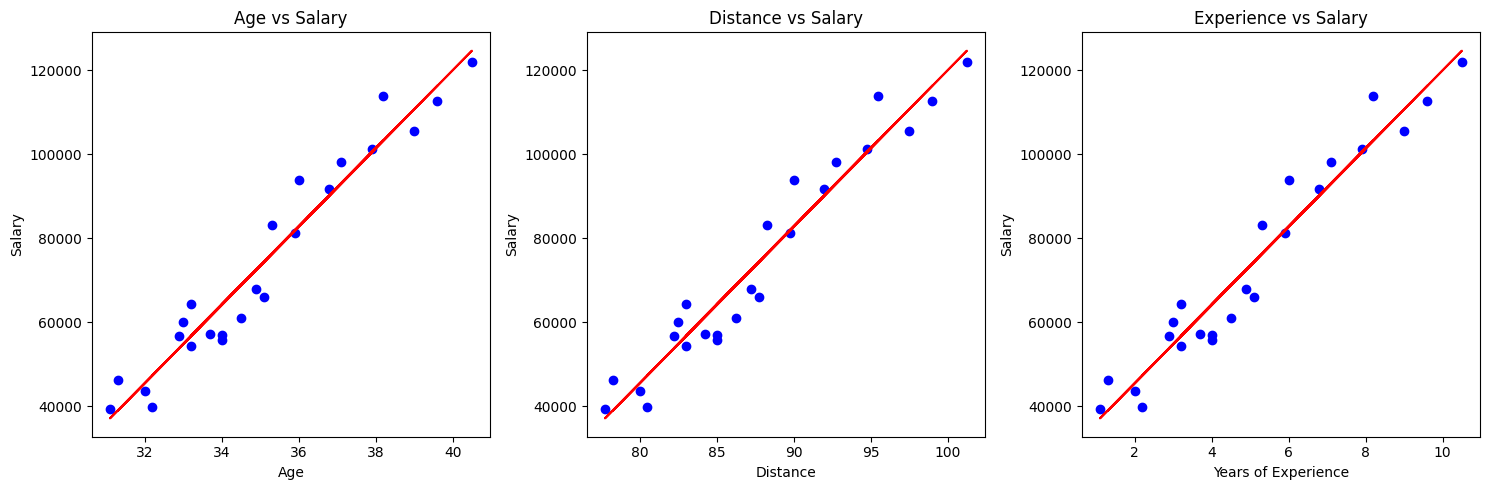

In [6]:
#Scatter ploting to see relation b/w testing and training data

# Creating subplots for each predictor
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(x_train['age'], y_train, color='blue')
plt.plot(x_train['age'], model.predict(x_train), color='red')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')

plt.subplot(1, 3, 2)
plt.scatter(x_train['distance'], y_train, color='blue')
plt.plot(x_train['distance'], model.predict(x_train), color='red')
plt.xlabel('Distance')
plt.ylabel('Salary')
plt.title('Distance vs Salary')

plt.subplot(1, 3, 3)
plt.scatter(x_train['YearsExperience'], y_train, color='blue')
plt.plot(x_train['YearsExperience'], model.predict(x_train), color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')

plt.tight_layout()
plt.show()

Text(0.5, 0, 'salary')

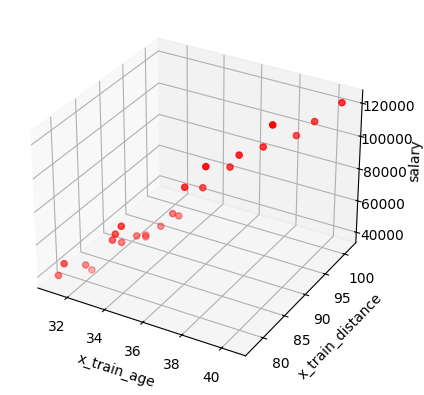

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = x_train['age']
x2 = x_train['distance']
y= y_train

ax.scatter(x1, x2, y, c='r', marker='o')

# Set axis labels
ax.set_xlabel('x_train_age')
ax.set_ylabel('x_train_distance')
ax.set_zlabel('salary')

In this plot:

- The x-axis represents `age`.
- The y-axis represents `distance`.
- The z-axis represents `salary`.

### Interpretation

To interpret this 3D scatter plot, observe the following:

1. **Overall Trend**:
   - There appears to be a positive correlation between `age` and `salary`, as points with higher ages tend to have higher salaries.
   - Similarly, there seems to be a positive correlation between `distance` and `salary`, as points with higher distances also tend to have higher salaries.

2. **Cluster Analysis**:
   - The data points form a distinct upward trend, indicating that both `age` and `distance` are positively correlated with `salary`.
   - If the points are closely packed and form a clear upward path, this suggests a strong correlation.

3. **Data Distribution**:
   - The data points are distributed across a range of ages (from around 32 to 40) and distances (from around 80 to 100).
   - The higher salary values are associated with higher ages and distances.

### Limitations and Considerations

- **Multicollinearity**: Since both `age` and `distance` are positively correlated with `salary`, there might be multicollinearity between `age` and `distance`. It's essential to check the correlation between independent variables and use techniques like Variance Inflation Factor (VIF) to detect multicollinearity.
- **Complexity**: A 3D scatter plot gives a visual sense of how variables relate to each other, but interpreting it quantitatively can be challenging. Additional statistical analysis is recommended to understand the exact nature of these relationships.
- **Model Fit**: Consider fitting a regression plane to this 3D plot to visualize how well your linear regression model captures the relationship between the variables. This can be done by plotting the predicted values from your model.


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


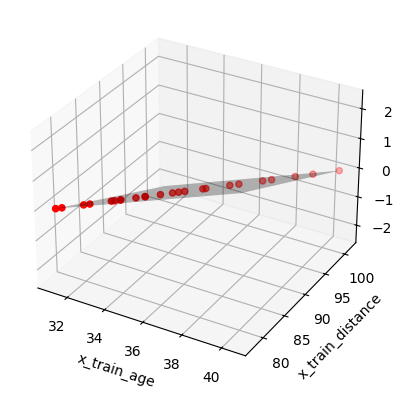

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Fit the model
model = LinearRegression().fit(x_train[['age', 'distance']], y_train)

# Create grid for age and distance
x1_surf, x2_surf = np.meshgrid(np.linspace(x_train['age'].min(), x_train['age'].max(), 20), 
                               np.linspace(x_train['distance'].min(), x_train['distance'].max(), 20))
x_surf = np.c_[x1_surf.ravel(), x2_surf.ravel()]
y_surf = model.predict(x_surf).reshape(x1_surf.shape)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(x_train['age'], x_train['distance'], y_train, c='r', marker='o')

# Plot regression plane
ax.plot_surface(x1_surf, x2_surf, y_surf, color='None', alpha=0.3)

# Set axis labels
ax.set_xlabel('x_train_age')
ax.set_ylabel('x_train_distance')
ax.set_zlabel('salary')

plt.show()


Multiple regression yields graph with many dimensions. The dimension of the graph increases as the features increases. In your case, X has two features. Scatter plot takes argument with only one feature in X and only one class in y.Try taking only one feature for X and plot a scatter plot. By doing so you will be able to study the effect of each feature on the dependent variable

In [9]:
import statsmodels.api as sm

# Model evaluation using statsmodels
# Adding a constant to the model (intercept)
X_train_sm = sm.add_constant(x_train)

# Fitting the model
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Getting the summary
model_summary = model_sm.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     352.1
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           5.03e-15
Time:                        07:46:19   Log-Likelihood:                -242.89
No. Observations:                  24   AIC:                             489.8
Df Residuals:                      22   BIC:                             492.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -276.2100     19.758    -

**Explanation of the Output**

**R-squared:**Indicates the proportion of variance in the dependent variable that is predictable from the independent variables. Values range from 0 to 1, with higher values indicating a better fit.
Adjusted R-squared: Adjusted for the number of predictors in the model. This is more useful than R-squared when comparing models with a different number of predictors.

**Coefficients and p-values:** Shows the estimated effect of each predictor on the dependent variable and the statistical significance of these effects. A p-value less than 0.05 typically indicates that the predictor is statistically significant.

**F-statistic and its p-value:** Tests the overall significance of the model. A significant p-value (less than 0.05) indicates that the model is a good fit for the data.

**Interpreting the Summary**

Look at the coefficients to see the impact of each predictor.
Check the p-values for each predictor to determine their significance.
Evaluate the R-squared and adjusted R-squared values to understand the model's explanatory power.
The F-statistic and its p-value tell you if the overall regression model is significant.

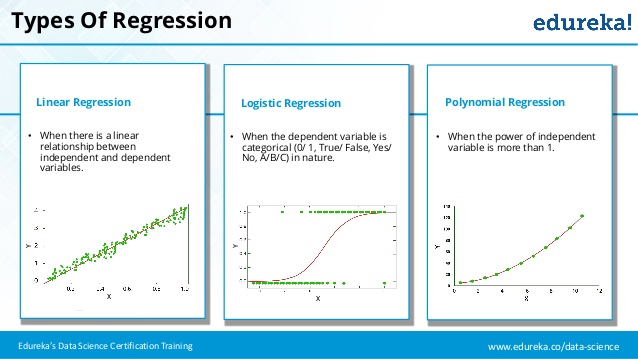

# Logistic Regression

Logistic regression, despite its name, is primarily used as a classification model, not a regression model. It is designed to predict the probability that a given data point belongs to a certain class, and the output is typically transformed using a logistic (also known as sigmoid) function to constrain it between 0 and 1. This makes it suitable for binary classification tasks, such as determining whether an email is spam or not spam. It can also be extended to multi-class classification using techniques like one-vs-rest (OvR) or multinomial logistic regression.

The debate over whether logistic regression is a regression or a classification model stems from its methodology and the context in which it is used:

1. **Regression Roots**: Logistic regression is fundamentally rooted in regression techniques. It estimates probabilities using a logistic function, which is a continuous and differentiable function, similar to how linear regression predicts continuous outcomes. The model computes a linear combination of the input features (like linear regression) but then applies the logistic function to bound the output between 0 and 1.

2. **Output Interpretation**: The output of logistic regression is a probability score that reflects the likelihood of a data point belonging to a particular class. This probabilistic output can be interpreted as fitting to an underlying continuous scale (the probability), which aligns with regression approaches. However, in practice, a threshold (commonly 0.5) is often applied to these probabilities to make a binary decision (e.g., yes/no, true/false), thus using it as a classifier.

3. **Historical and Conceptual Context**: Historically, regression methods were developed for predicting continuous numeric values. Logistic regression uses a similar framework (estimating parameters that minimize loss) but does so for a categorical outcome framed in a probabilistic context. This blurs the lines between traditional regression and classification paradigms.

4. **Statistical Modeling**: From a statistical modeling perspective, logistic regression is seen as an instance of a generalized linear model (GLM), specifically using a binomial distribution and a logit link function. This positions it within a broader family of regression models but tailored for binary outcomes.

The debate, therefore, centers around the dual nature of logistic regression—it models a continuous probability, yet it is typically used for binary classification. This duality allows for flexible interpretations and applications, leading to differing opinions on whether it should be categorized strictly as one type of model or the other.

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Create a small sample dataset
data = {
    'HoursStudied': [2, 3, 5, 7, 11, 13, 17, 19, 23, 29],
    'AttendanceRate': [50, 55, 65, 70, 75, 80, 85, 90, 95, 100],
    'Pass': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
}

# Feature 1: HoursStudied - Number of hours the student studied.
# Feature 2: AttendanceRate - Attendance rate of the student as a percentage.
# Target: Pass - Whether the student passed the exam (1 for pass, 0 for fail).


df = pd.DataFrame(data)

# Step 2: Split the dataset into training and testing sets
X = df[['HoursStudied', 'AttendanceRate']]
y = df['Pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 3: Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)

# Print classification report and accuracy score
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

# For additional insight, let's print the model's coefficients
print("Model Coefficients:")
print(model.coef_)
print("Model Intercept:")
print(model.intercept_)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Accuracy Score:
1.0
Model Coefficients:
[[0.27210763 0.66224385]]
Model Intercept:
[-54.58902187]


**Interpretation the output from the logistic regression model:**

### Classification Report:
- **Precision**: The proportion of true positive predictions among all positive predictions. Both classes (0 and 1) have a precision of 1.00, meaning all positive predictions were correct.
- **Recall**: The proportion of true positive predictions among all actual positives. Both classes have a recall of 1.00, meaning the model correctly identified all actual positives.
- **F1-Score**: The harmonic mean of precision and recall. Both classes have an F1-score of 1.00, indicating perfect precision and recall.
- **Support**: The number of occurrences of each class in the test set. Each class (0 and 1) has 1 instance.

### Accuracy Score:
- **1.0**: The model's overall accuracy is 100%, meaning it correctly predicted the class for all test instances.

### Model Coefficients:
- **[[0.27210763 0.66224385]]**: These values represent the weights assigned to `HoursStudied` and `AttendanceRate`, respectively. A higher weight indicates a stronger influence on the probability of passing.

### Model Intercept:
- **[-54.58902187]**: This is the bias term in the logistic regression model. It adjusts the baseline probability of passing before considering the effects of the predictors.

In summary, the model performed perfectly on this small test set, correctly predicting the pass/fail status for all instances. The coefficients suggest that both `HoursStudied` and `AttendanceRate` positively influence the likelihood of passing, with `AttendanceRate` having a slightly larger impact.

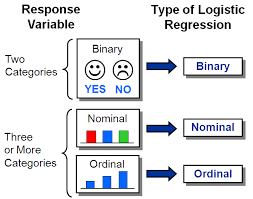

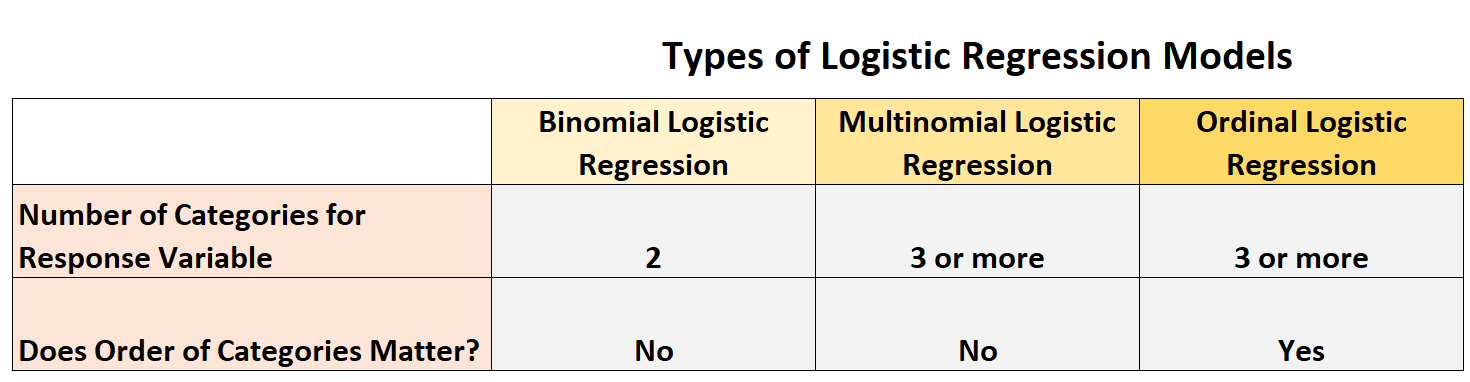

# Difference Between Linear and Logistic Regression

| Feature                     | Linear Regression                                                     | Logistic Regression                                                   |
|-----------------------------|-----------------------------------------------------------------------|-----------------------------------------------------------------------|
| **Purpose**                 | Predicts a continuous dependent variable.                             | Predicts a categorical dependent variable.                            |
| **Dependent Variable**      | Continuous (e.g., price, height, salary).                             | Categorical (e.g., yes/no, true/false).                               |
| **Output**                  | Real number values.                                                   | Probability values between 0 and 1, often thresholded to 0 or 1.      |
| **Cost Function**           | Mean Squared Error (MSE).                                             | Binary Cross-Entropy (Log Loss).                                      |
| **Best Suited For**         | Problems where the outcome is a quantity.                             | Problems where the outcome is a class or category.                    |
| **Model Type**              | Linear model.                                                         | Classification model (binary or multiclass).                          |
| **Algorithm**               | Uses Ordinary Least Squares (OLS) method to minimize error.           | Uses Maximum Likelihood Estimation (MLE) to find the best parameters. |
| **Assumptions**             | Linearity, independence, homoscedasticity, normality.                 | Independence of errors, linearity of logit, large sample size.        |
| **Example Use Case**        | Predicting house prices, stock prices, etc.                           | Predicting whether an email is spam or not, predicting disease presence. |
| **Interpretability**        | Coefficients represent the change in the dependent variable for one unit change in the predictor. | Coefficients represent the log odds change in the dependent variable for one unit change in the predictor. |



A cost function, also known as a loss function or objective function, is a measure used in machine learning and statistical modeling to evaluate how well a particular model's predictions match the actual data. It quantifies the error between the predicted values and the actual values, guiding the model's learning process to minimize this error. 

### Key Points about Cost Function:

1. **Purpose**: The main purpose of a cost function is to quantify the accuracy of a model. It provides a metric for the optimization algorithm to minimize during training.

2. **Optimization**: The model training process involves adjusting the model parameters (weights and biases) to minimize the cost function, thereby improving the model's predictions.

3. **Types**: Different types of cost functions are used for different types of machine learning problems. Common cost functions include:
   - **Mean Squared Error (MSE)**: Often used in linear regression for continuous outcomes. It calculates the average of the squared differences between predicted and actual values.
   - **Binary Cross-Entropy (Log Loss)**: Commonly used in binary classification problems (e.g., logistic regression). It measures the performance of a classification model whose output is a probability value between 0 and 1.

### Why Cost Functions are Important:

- **Model Evaluation**: Cost functions provide a quantitative basis to evaluate the performance of a model.
- **Guidance for Optimization**: They guide the optimization algorithm (such as gradient descent) to update the model parameters in the direction that reduces the error.
- **Comparing Models**: Cost functions allow for the comparison of different models or different sets of parameters within the same model to find the best performing one.

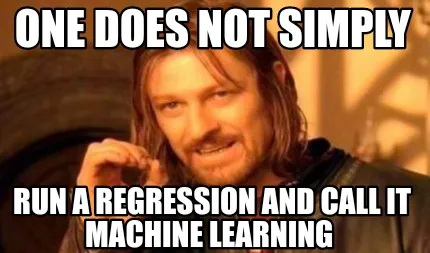

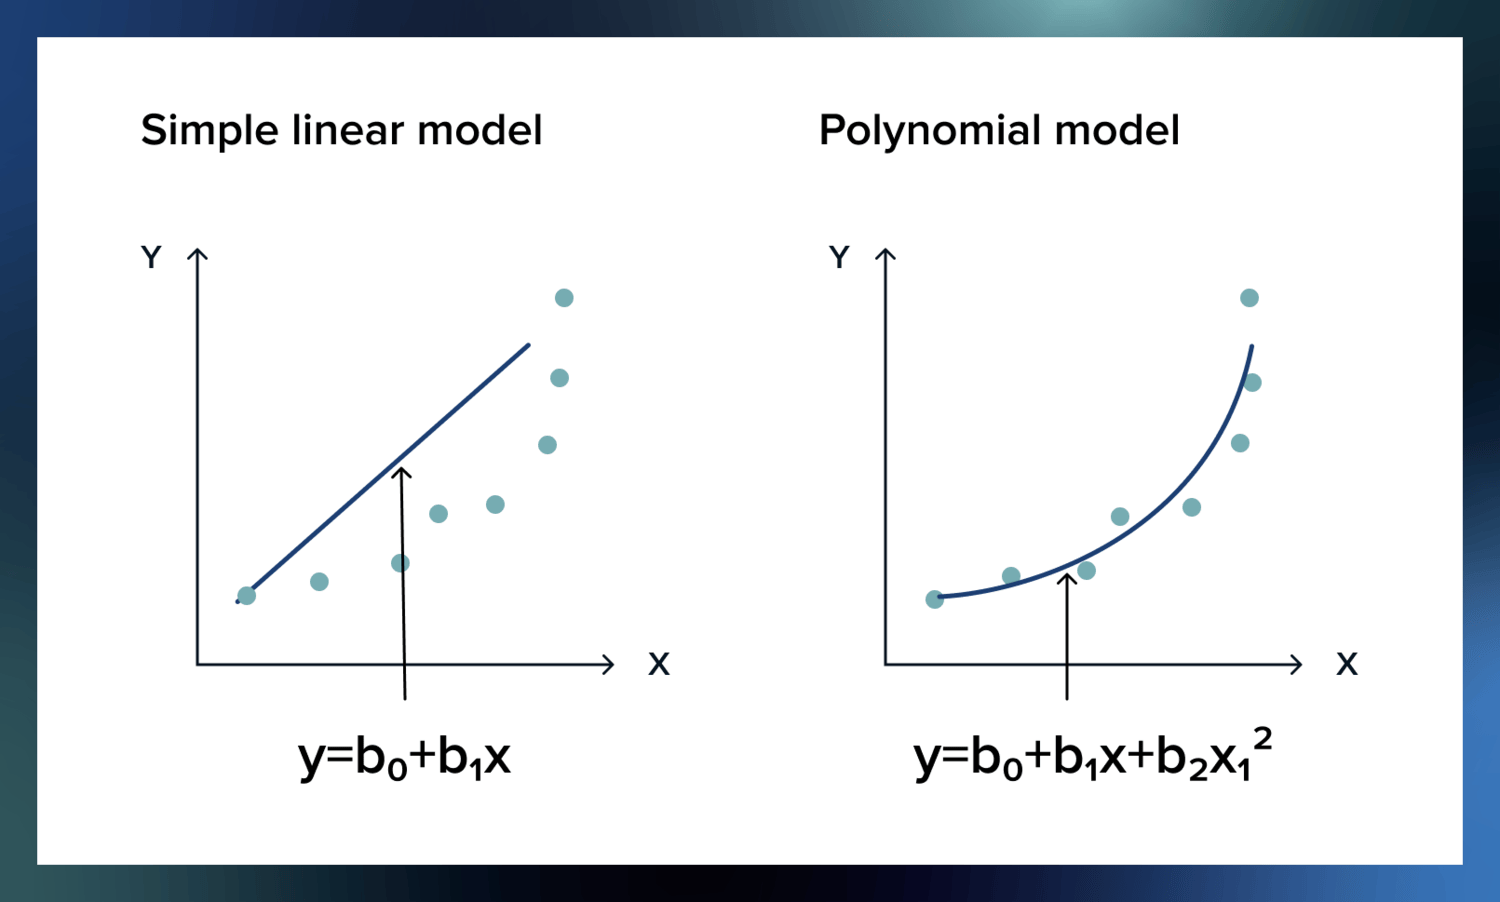

# Polynomial Regression

y = a + b1x + b2x^2 +....+ bnx^n

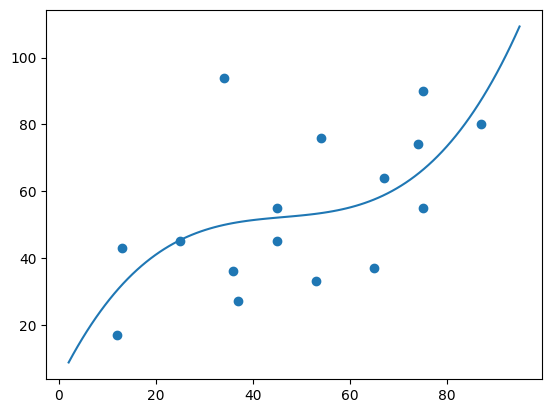

In [11]:
####### BAD FIT Example
import numpy as np
import matplotlib.pyplot as plt

x=[12,13,65,54,25,75,36,67,74,37,75,45,45,34,53,87]
y=[17,43,37,76,45,90,36,64,74,27,55,45,55,94,33,80]

mymodel= np.poly1d(np.polyfit(x,y,3))   # 3 degree =polynomial degree, 

myline= np.linspace(2, 95, 100)


plt. scatter(x,y)
plt.plot(myline, mymodel(myline))
plt.show()

>    **Polynomial degree** refers to the highest power of the independent variable (x) in the polynomial equation used to fit the data.
>   The parameter 3 indicates that you're fitting a polynomial of degree 3 to the data. This means the polynomial equation used to fit the data will have terms up to x^3.

For example, if your polynomial equation is:

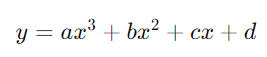

then it's a **polynomial of degree 3, because the highest power of x is 3**. The np.polyfit() function fits this polynomial equation to your data points (x, y).

Choosing the appropriate polynomial degree is important. A higher degree polynomial can fit the training data more closely but may lead to overfitting, where the model captures noise in the training data rather than the underlying relationship. On the other hand, a lower degree polynomial may underfit the data, failing to capture important patterns.

It's often a good idea to try different polynomial degrees and use techniques like cross-validation to evaluate which degree provides the best balance between bias and variance for your specific dataset.

>   No test-train split, as data was already too small

In [12]:
# -R squared

import numpy
from sklearn.metrics import r2_score

x = [12,13,65,54,25,75,36,67,74,37,75,45,45,34,53,87]
y=  [17,43,37,76,45,90,36,64,74,27,55,45,55,94,33,80]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

print(r2_score(y, mymodel(x)))

0.3415094019735355


Above bad data gave really poor R2 score as expected, following code is for good data


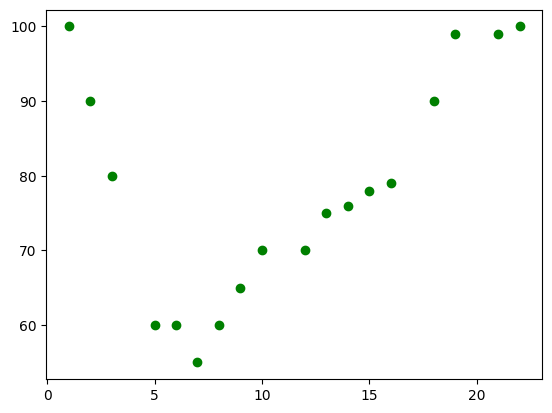

In [13]:
# Good data
import matplotlib.pyplot as plt

x= [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y= [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt. scatter(x,y,color="green")

plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_23280\3733804344.py:8: RankWarning: Polyfit may be poorly conditioned
  mymodel= np.poly1d(np.polyfit(x,y,100))   # 3 degree =polynomial degree,


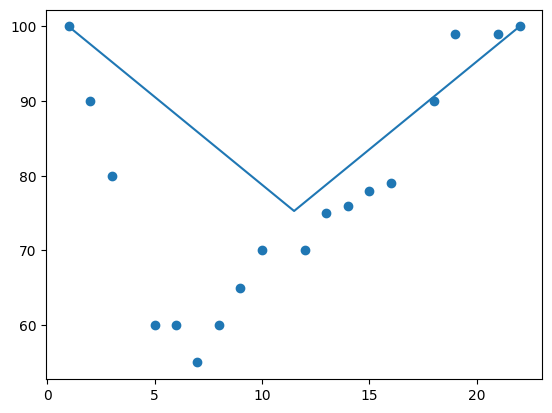

In [14]:
# Good data
import matplotlib.pyplot as plt

x= [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y= [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]


mymodel= np.poly1d(np.polyfit(x,y,100))   # 3 degree =polynomial degree, 
#Degree(s) of the fitting polynomials.
#  If deg is a single integer all terms up to and including 
# the deg’th term are included in the fit. 
# For NumPy versions >= 1.11.0 a list of integers specifying the degrees 
# of the terms to include may be used instead.

myline= np.linspace(1, 22, 3)

# 1: starting point of the sequence

# 22: ending point of the sequence.

# 100: Number of evenly spaced points to generate between the starting and ending points. In this case, it generates 100 points.


plt. scatter(x,y)
plt.plot(myline, mymodel(myline))
plt.show()

In [15]:
# -R squared

import numpy
from sklearn.metrics import r2_score

x= [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y= [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y,3))

print(r2_score(y, mymodel(x)))

0.9432150416451026


In [16]:
# Prediction of new value #USING np

import numpy
from sklearn.metrics import r2_score

x= [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y= [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))
speed= mymodel(18)
print(speed)

92.48673749579999


**NUMPY LINSPACE** CREATES SEQUENCES OF EVENLY SPACED VALUES WITHIN AN INTERVAL. Essentally, you specify a starting point and an ending point of an interval, and then specify the total number of breakpoints you want within that interval (including the start and end points). 

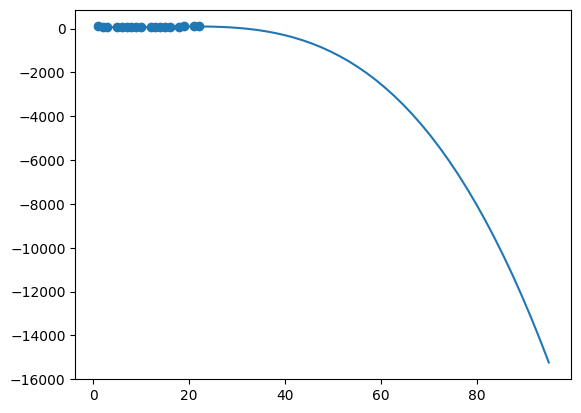

In [17]:
# Good data
import matplotlib.pyplot as plt

x= [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y= [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]


mymodel= np.poly1d(np.polyfit(x,y,3))   # 3 degree =polynomial degree, 

myline= np.linspace(2, 95, 50)    #(start, end, number of breakpoints btw start and end points)
# NUMPY LINSPACE CREATES SEQUENCES OF EVENLY SPACED VALUES WITHIN AN INTERVAL

plt. scatter(x,y)
plt.plot(myline, mymodel(myline))
plt.show()

Example practice

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing dataset
# dataset=pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
dataset=pd.read_csv('datasets/Position_Salaries.csv')

x=dataset.iloc[:,1:2].values  # all rows and the second column.

y=dataset.iloc[:, 2].values   #  all rows and the third column.

In [19]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [20]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [21]:
# train_test split

from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test, = train_test_split(x,y,test_size=0.2,random_state=0)  #Always write train first then test


In [22]:
#Fitting linear regression model to dataset

from sklearn.linear_model import LinearRegression
# model_Lin_reg= LinearRegression ()    #to create model
#now to fit that created model
#model= model.fit( x_train, y_train, )     # merging two codes
model_Lin_reg= LinearRegression ().fit( x_train, y_train)
model_Lin_reg


LinearRegression()

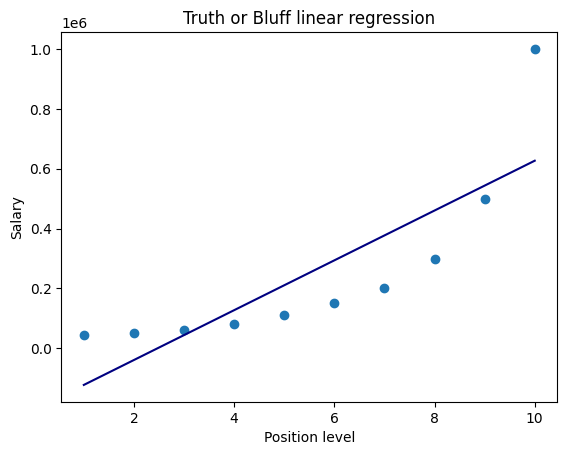

In [23]:
# visualizaing linear regression

def viz_linear():
    plt.scatter(x, y)
    plt.plot(x, model_Lin_reg.predict(x),color="#000080")
    plt.xlabel("Position level")
    plt.ylabel("Salary")
    plt.title("Truth or Bluff linear regression")
    plt.show()
    return
viz_linear()


Data is more suitable for a polynomial regression

In [24]:
# fitting polynomial reg. to dataset 
from sklearn.preprocessing import PolynomialFeatures # importing a class for Polynomial Regression
poly_regr = PolynomialFeatures(degree = 3) # our polynomial model is of order
X_poly = poly_regr.fit_transform(x) # transforms the features to the polynomial form
pol_reg = LinearRegression() # creates a linear regression object
pol_reg.fit(X_poly, y) # fits the linear regression object to the polynomial features


LinearRegression()

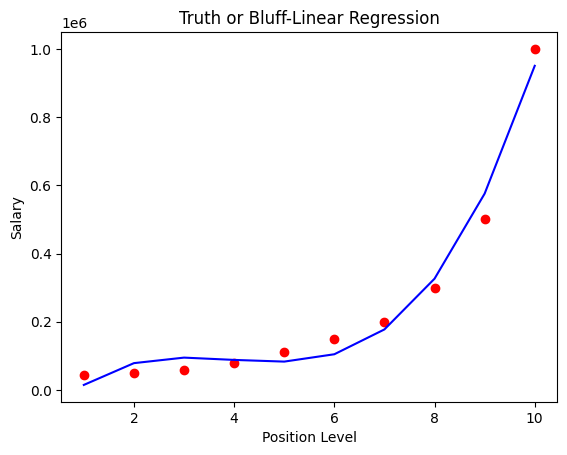

In [25]:
def viz_polynomial():
    plt.scatter(x, y, color = 'red') # plotting the training set
    plt.plot(x, pol_reg.predict(X_poly), color = 'blue') # plotting the linear regression line
    plt.title('Truth or Bluff-Linear Regression') 
    plt.xlabel('Position Level') # adds a label to the x-axis
    plt.ylabel('Salary') # adds a label to the y-axis
    plt.show() # prints our plot
    return
viz_polynomial()

It means we just need to transform "x" in polynomial regression as per polynomial equation. Following code is used

 X_poly = poly_regr.fit_transform(x) # transforms the features to the polynomial form


In [26]:
# We can use the above line for prediction 

Predict_lin= model_Lin_reg.predict([[11]]) # predicting a new result with linear regression

In [27]:
#A new result prediction with polynomial regression
predict_polynomial= pol_reg.predict(poly_regr.fit_transform([[11]]))
#poly_regr.fit_transform(x)

In [28]:
print("Predict_lin", Predict_lin)
print("predict_polynomial", predict_polynomial)
print("difference", Predict_lin - predict_polynomial)

Predict_lin [709872.79843444]
predict_polynomial [1475333.33333329]
difference [-765460.53489885]


# MCQs

**You have been given a dataset with two variables: `Hours Studied` (independent variable) and `Exam Score` (dependent variable). You need to predict the exam scores based on the hours studied using Simple Linear Regression.**

Which of the following statements is correct?

a) The model will predict the exam score as a nonlinear function of hours studied.

b) The model will predict the exam score as a linear function of hours studied.

c) The model will ignore the hours studied and predict the exam score based only on the mean exam score.

d) The model will predict the exam score based on multiple independent variables.



**Question 2:**
**You are working with a dataset that includes multiple features: `Age`, `Education Level`, `Work Experience`, and `Salary`. You want to predict the `Salary` using these features.**

Which regression model should you use?

a) Simple Linear Regression

b) Multiple Linear Regression

c) Logistic Regression

d) Polynomial Regression

### Logistic Regression

**Question 3:**
You have a dataset containing customer information and their subscription status to a service (Subscribed: Yes/No). You want to build a model to predict whether a new customer will subscribe to the service.

Which regression model is most appropriate for this task?

a) Simple Linear Regression

b) Multiple Linear Regression

c) Logistic Regression

d) Polynomial Regression

### Difference Between Linear and Logistic Regression

**Question 4:**
Which of the following statements correctly describes the difference between Linear Regression and Logistic Regression?

a) Linear Regression is used for classification tasks, while Logistic Regression is used for regression tasks.

b) Linear Regression predicts continuous outcomes, while Logistic Regression predicts binary outcomes.

c) Linear Regression uses a sigmoid function, while Logistic Regression uses a linear function.

d) Linear Regression is more complex than Logistic Regression.

### Polynomial Regression

**Question 5:**
You have a dataset with a single independent variable `X` and a dependent variable `Y`. The relationship between `X` and `Y` appears to be nonlinear. You want to model this relationship using regression.

Which regression model is most suitable for this task?

a) Simple Linear Regression

b) Multiple Linear Regression

c) Logistic Regression

d) Polynomial Regression

## Answers and Explanations

1. **Answer:** b) The model will predict the exam score as a linear function of hours studied.
   - **Reason:** Simple Linear Regression assumes a linear relationship between the independent and dependent variables.

2. **Answer:** b) Multiple Linear Regression
   - **Reason:** Multiple Linear Regression is used when there are multiple independent variables predicting a single dependent variable.

3. **Answer:** c) Logistic Regression
   - **Reason:** Logistic Regression is used for binary classification tasks, such as predicting whether a customer will subscribe (Yes/No).

4. **Answer:** b) Linear Regression predicts continuous outcomes, while Logistic Regression predicts binary outcomes.
   - **Reason:** Linear Regression is used for continuous dependent variables, whereas Logistic Regression is used for binary or categorical dependent variables.

5. **Answer:** d) Polynomial Regression
   - **Reason:** Polynomial Regression is suitable for modeling nonlinear relationships between the independent and dependent variables.

# Decision tree classifiers

Decision Tree classifier (Theory)

1-binary data is classified

2-we cannot draw a line to separate classes

3-A lot of nested if/else statements are used

4-family tree goes on until last child.

5-first node is root node.it is also a decision node,,and has highest entropy.entropy means data in it

jahan beech mein jis node pay ruk jayay= pure node

node with condition= decision node

leaf note, endpoint of Dt, actually classify and predict

optimal splitting of nodes is based on information gain IG which is in turn calculated by genie index, and entropy.

DT forest is greedy that wherever it gets more IG it will select that split and sometimes accuracy is comprised as a result

DT is faster in selection


### Decision Tree:
A decision tree is a tree-like structure where each internal node represents a feature (or attribute), each branch represents a decision rule, and each leaf node represents the outcome or classification. Think of it as a flowchart where decisions are made based on the features of the data.

### Node:
A node is a point in the decision tree where a decision is made based on the value of a certain feature.

### Root Node:
The root node is the topmost node in the decision tree, representing the feature that best splits the data into distinct classes.

### Splitting:
Splitting refers to the process of dividing a node into two or more sub-nodes based on a certain criterion, such as Gini impurity or information gain.

### Branch:
A branch is a path from the root node to a leaf node or to another internal node.

### Leaf Node:
A leaf node is a terminal node in the decision tree that represents the final outcome or class.

### Pruning:
Pruning is the process of removing parts of the decision tree that are not relevant or that may lead to overfitting. It helps simplify the tree and improve its generalization ability.


### Gini Index:
The Gini index, also known as Gini impurity, is a measure of impurity or uncertainty in a set of data. A lower Gini impurity indicates that a node predominantly contains instances of a single class. In the context of decision trees, it is used to evaluate how well a particular feature splits the data into classes.

- **Interpretation**:
  - A Gini index of 0 indicates that all the instances in the node belong to the same class, implying perfect purity.
  - A Gini index closer to 1 implies higher impurity, meaning the instances are evenly distributed across different classes.

- **Decision Tree Usage**:
  - When building a decision tree, the feature with the lowest Gini index after splitting is usually chosen as the splitting criterion. Lower Gini impurity indicates better separation of classes.

### Entropy:
Entropy is another measure of impurity commonly used in decision trees. It quantifies the uncertainty or randomness in a set of data.

- **Interpretation**:
  - Entropy is 0 when all instances in a node belong to the same class, indicating perfect purity.
  - Entropy is higher when the instances are evenly distributed across different classes, indicating higher impurity.

- **Decision Tree Usage**:
  - Similar to the Gini index, entropy is used to determine the best feature for splitting nodes in decision trees. Features that result in lower entropy after splitting are preferred.

### Relationship:
- Both Gini index and entropy are used to evaluate the impurity of a node in a decision tree.
- In practice, they often lead to similar results, but there can be subtle differences.
- Gini index tends to be faster to compute, while entropy may be more sensitive to changes in class probabilities.

### Information Gain:
Information gain measures the reduction in entropy or uncertainty achieved by splitting a node. It helps decide which feature to split on at each node.

### Overfitting:
Overfitting occurs when a decision tree captures noise or specific patterns in the training data that do not generalize well to new, unseen data.

### Underfitting:
Underfitting occurs when a decision tree is too simple to capture the underlying patterns in the data, leading to poor performance on both the training and testing data.

Here's a simple decision tree diagram:
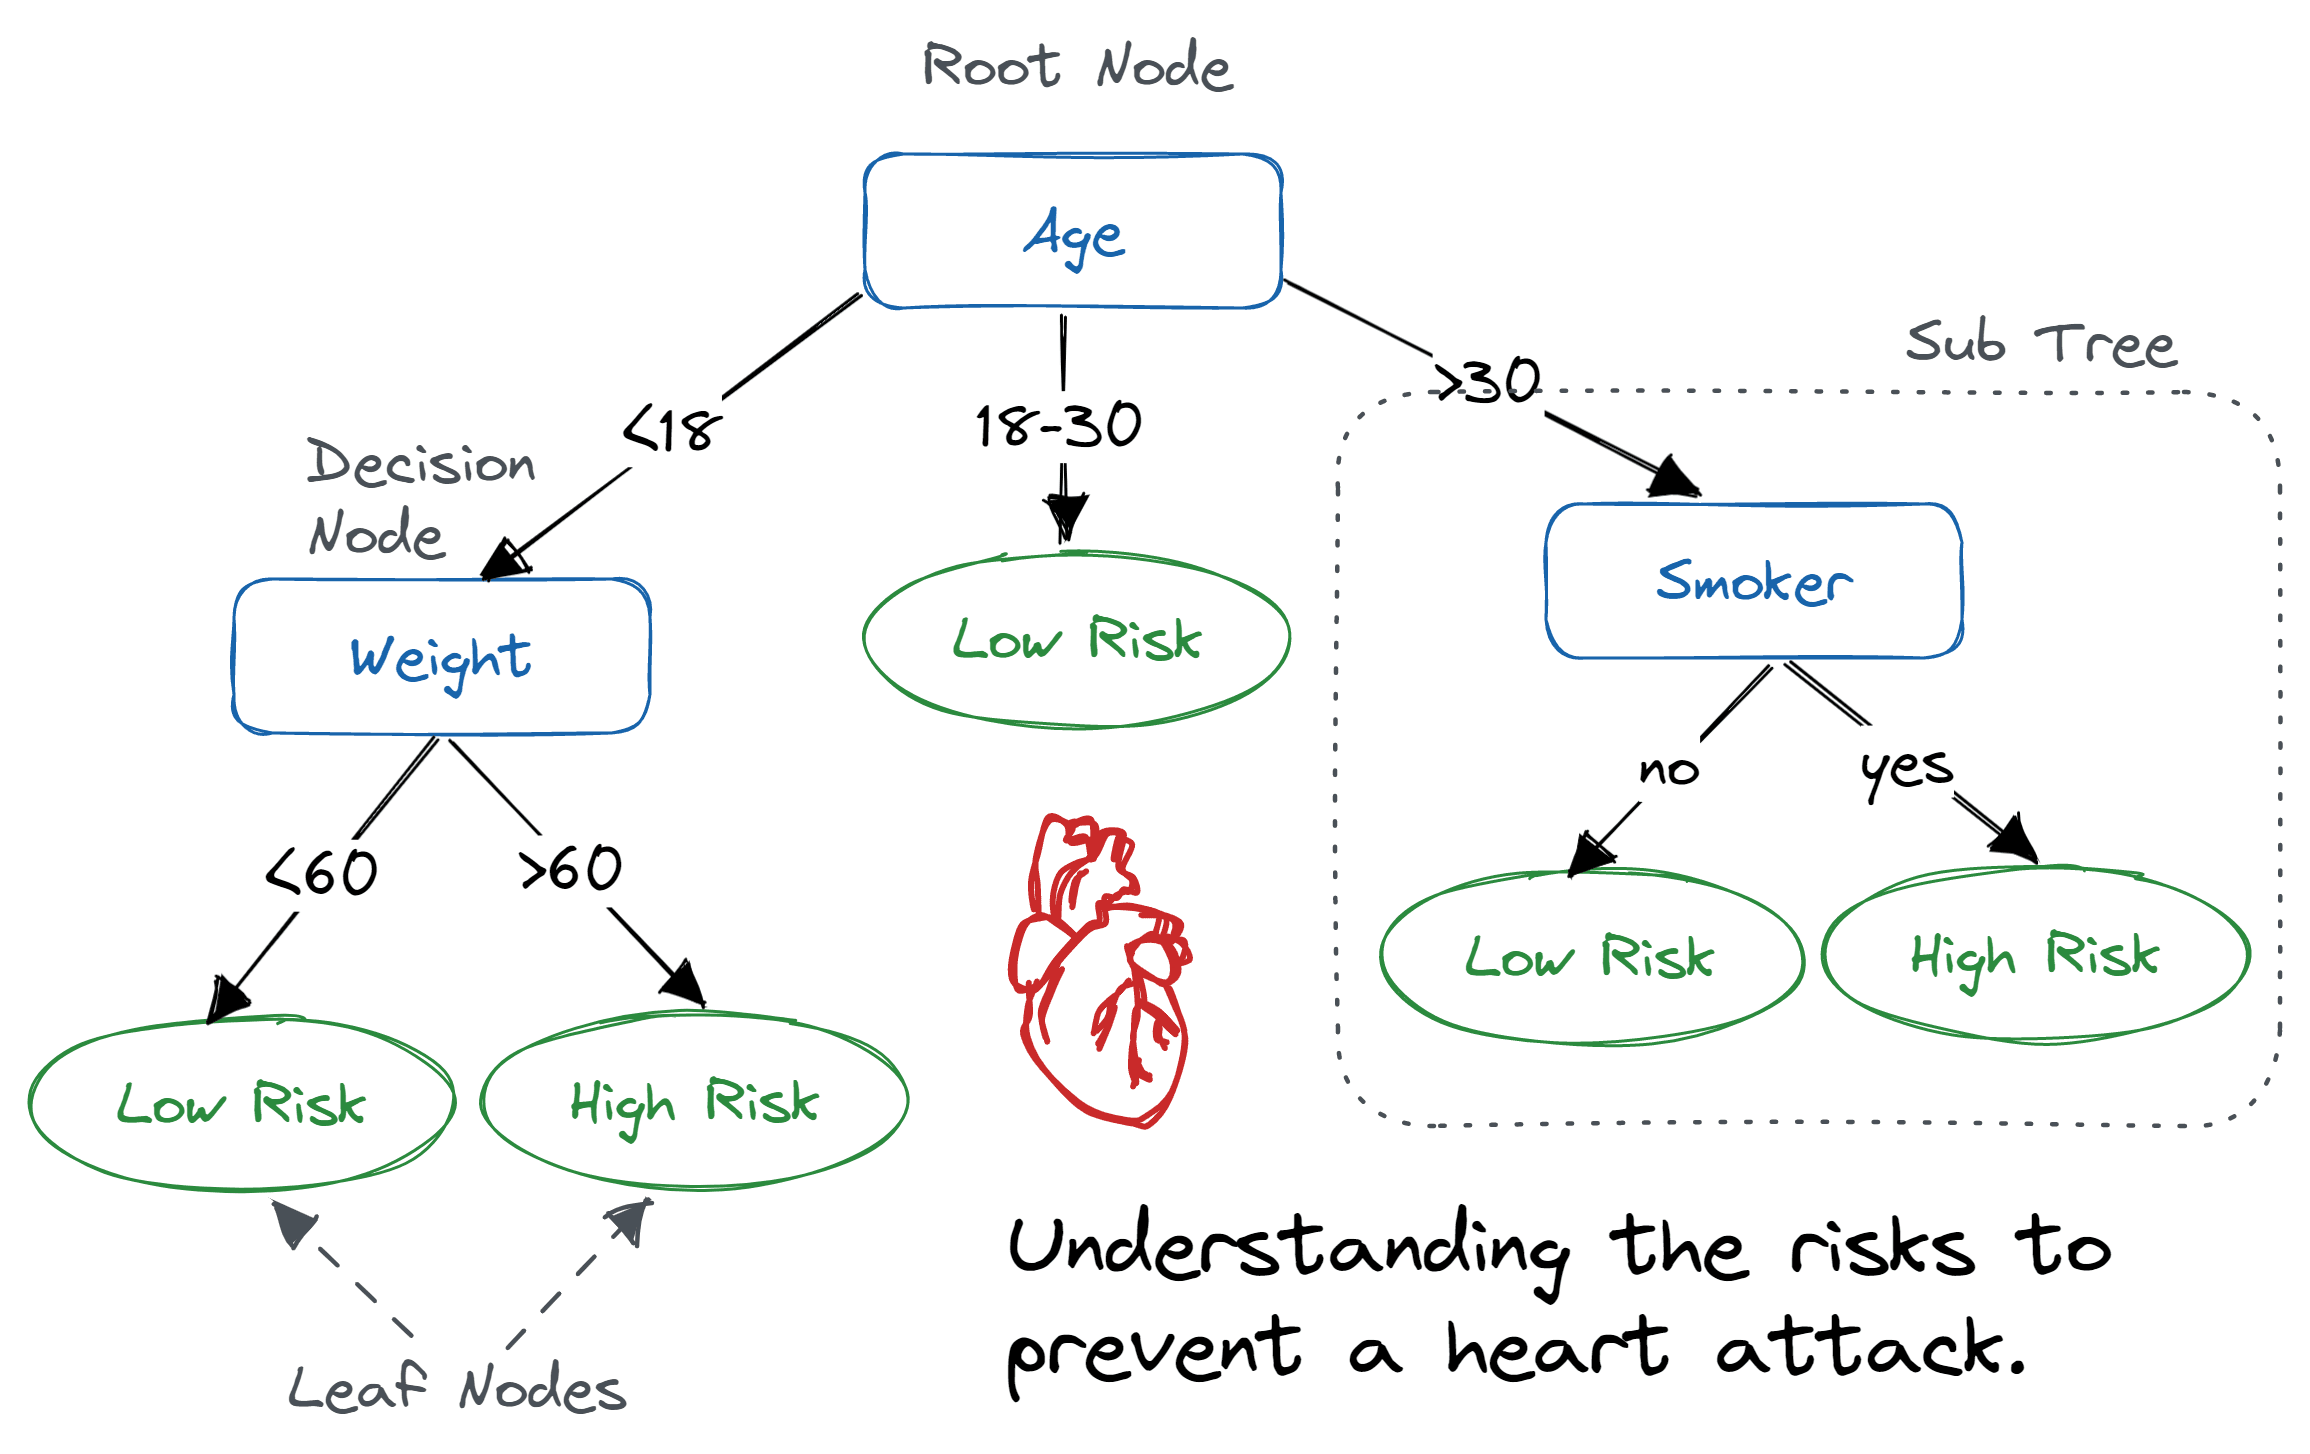

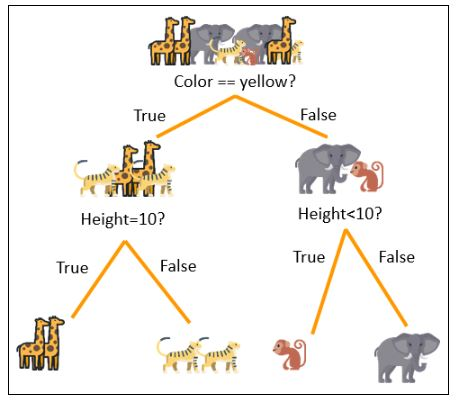

In [29]:
import pandas as pd

df=df=pd.read_csv(r"datasets\ML_likelines_CSV.csv")

df.head()

df["gender"]=df["gender"].replace('Male',1)
df["gender"]=df["gender"].replace('Female',0)
df.head()

#selection of input and output variables

x=df[['weight','gender','height', 'age']]  #using all 4 independent variables
y=df['likeness']
y.head()

df.head()

,age,height,weight,gender,likeness
0,27,170.688,76.0,1,Biryani
1,41,165.000,70.0,1,Biryani
2,29,171.000,80.0,1,Biryani
3,27,173.000,102.0,1,Biryani
4,29,164.000,67.0,1,Biryani


In [30]:
# Machine Learning algorithms

from sklearn.tree import DecisionTreeClassifier

#create and fit model

model= DecisionTreeClassifier().fit(x,y)

#prediction

model.predict([[80,170,80,1]])         #80 years age and 1 shows male




c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Biryani'], dtype=object)

=====>> Below code till score can be applied on linear and multiple linear regression as wellr 

In [31]:
# 1-How to measure accuracy of model
# 2- Split data into test and train

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test, y_train, y_test, = train_test_split(x,y,test_size=0.2,random_state=0)  #Always write train first then test

#creating model
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

predicted_values= model.predict(x_test)
predicted_values


#checking score
#y_test=actual_values

score=accuracy_score(y_test , predicted_values)
score



0.46938775510204084

In above code, it will randomly take values and accuracy score will be different every time we will run it. so we need to put ,random_state=0 in the code, while test_train_split

every time for training and testing of model we will need to run above code. What if we can save a model after training and use that already trained model later.

In [32]:
# How to train and save  model # we can save it either by joblib or by pickle
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import joblib

model= DecisionTreeClassifier().fit(x,y)

joblib.dump(model, "foodie.joblib") # In inverted commas add name and add extension .joblib



['foodie.joblib']

# how to Import /run saved model on our data

In [33]:
# load the model from disk
loaded_model = joblib.load('foodie.joblib')
result = loaded_model.score(x_test, y_test)
print(result)

1.0


In [34]:
#graph
from sklearn import tree 
# tree module from the sklearn (scikit-learn) library, which contains functions for building and exporting decision trees.
model=DecisionTreeClassifier().fit(x,y)

#graphic evaluation/ look into what happened

tree.export_graphviz(model,
                    out_file="foodie.dot",
                    feature_names=['weight','gender','height', 'age'],
                    class_names= sorted(y.unique()),
                    label="all", #Indicates that all labels (both for features and classes) should be displayed on the graph.
                    rounded=True, #When set to True, draw node boxes with rounded corners.
                    filled=True)                 #.dot file extension to save

### Output and Visualization

The output of this code is a `.dot` file named `foodie.dot`. To visualize the decision tree:

1. **Install Graphviz**: Ensure that Graphviz is installed on your system. You can install it using a package manager or download it from the Graphviz website.
   
2. **Convert `.dot` to an Image**:
   - Use Graphviz to convert the `.dot` file to an image format (e.g., PNG, PDF).
   - Example command (run in the terminal):
     ```sh
     dot -Tpng foodie.dot -o foodie.png
     ```
   - This command converts the `foodie.dot` file to a `foodie.png` image.

# Decision tree classifiers on IRIS 

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
df=sns.load_dataset("iris")
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [36]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
x=df.iloc[ : , :-1]
y=df.iloc[ : , -1:]
x.head()
y.head()


,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


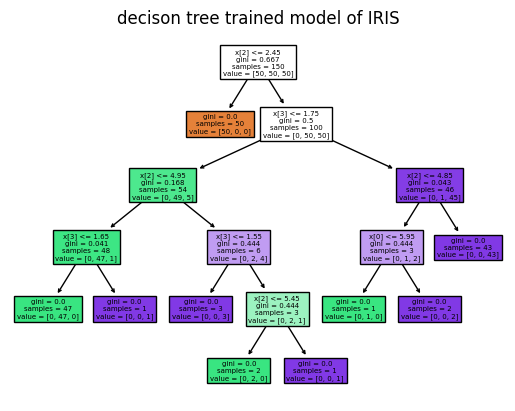

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

model=DecisionTreeClassifier().fit(x,y)
plot_tree(model, filled=True)  #filled=True parameter means that the nodes in the plot will be colored to indicate the class to which they predominantly belong.
plt.title("decison tree trained model of IRIS")

plt.savefig('tiff_compressed.tiff', dpi=600, format="tiff",
              facecolor="Red",  #Sets the background color of the plot to red.
              edgecolor="none", #sets the color of the border (or edge) around the entire figure when it is saved to a file.
                pil_kwargs={"compression": "tiff_lzw"} ) #Uses LZW compression for the TIFF file.
plt.show() 


The decision tree in the image is a classification model trained on the Iris dataset. The dataset contains three classes of iris flowers: Setosa, Versicolour, and Virginica, with 50 samples each. Here’s a detailed explanation of the terms and components of the decision tree:

### Understanding the Decision Tree

1. **Nodes**:
   - **Root Node**: The topmost node in a decision tree, which represents the entire dataset. It is the starting point for making decisions.
   - **Decision Nodes**: Nodes where the data is split based on certain conditions/features. These nodes have one or more child nodes.
   - **Leaf Nodes (Terminal Nodes)**: Nodes that do not split further. They represent the final decision or classification.

2. **Edges**: The connections between nodes that represent the outcome of a test applied to a feature. Each edge leads to a child node.

3. **Splits**: The condition used to divide the data into subsets. For example, `x[3] <= 0.8` is a split condition in the root node.

### Terminologies in the Decision Tree

1. **Sample**: This represents the number of instances (or data points) at a given node. For instance, in the root node, `samples = 150` indicates that all 150 data points are considered at this node.

2. **Gini Index (Gini Impurity)**:
   - A measure of impurity or impurity in a dataset. It quantifies the probability of a randomly chosen element being incorrectly classified if it was randomly labeled according to the distribution of labels in the subset.
   - Gini index ranges between 0 and 0.5, where 0 indicates a pure subset (all elements belong to one class) and 0.5 indicates maximum impurity.

3. **Information Gain**:
   - It is the reduction in entropy or impurity from a feature split. However, in this decision tree, the Gini index is used instead of entropy. 
   - Information gain is the measure used to select the feature and threshold that best splits the data at each node.

### Analyzing the Provided Decision Tree

- **Root Node**:
  - `x[3] <= 0.8` is the first split condition.
  - `gini = 0.667` indicates the impurity at this node.
  - `samples = 150` indicates all data points are considered.
  - `value = [50, 50, 50]` indicates the class distribution (equal in this case).

- **First Split**:
  - Left child of the root node:
    - The condition `x[3] <= 0.8` is true.
    - `gini = 0.0` shows this node is pure (all samples belong to one class).
    - `samples = 50` indicates the number of samples.
    - `value = [50, 0, 0]` means all samples are of class Setosa.
  - Right child of the root node:
    - The condition `x[3] <= 0.8` is false, so it goes to the right.
    - `gini = 0.5`, indicating more impurity.
    - `samples = 100` means 100 samples are considered here.
    - `value = [0, 50, 50]` indicates equal distribution of the other two classes.

- **Subsequent Splits**:
  - The decision tree continues to split the nodes based on different conditions (features and thresholds) until it reaches the leaf nodes.
  - Each node's `gini`, `samples`, and `value` provide insight into the purity and class distribution at that point in the tree.

### Key Points

- The decision tree model splits the dataset into subsets based on the values of the features.
- The goal is to create homogeneous subsets with respect to the target class.
- The Gini index helps in choosing the best feature and threshold for splitting by measuring the impurity reduction.
- Leaf nodes represent the final decision, where the model classifies the samples into different classes.

In [38]:

#prediction

model.predict([[3.9,3.5,2.4,1.2]]) # sepal_length, sepal_width, petal_length, petal_width


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [39]:
model.predict([[4.9,3.0,1.4,0.2]])   # sepal_length, sepal_width, petal_length, petal_width


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)

In [40]:
# Splitting and accuracy score
## 90/10
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test, y_train, y_test, = train_test_split(x,y,test_size=0.1,random_state=0)  #Always write train first then test
#creating model
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
predicted_values= model.predict(x_test)
score=accuracy_score(y_test , predicted_values)
score


1.0

In [41]:
## 70/30

x_train,x_test, y_train, y_test, = train_test_split(x,y,test_size=0.3,random_state=0)  #Always write train first then test
#creating model
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
predicted_values= model.predict(x_test)
score_2=accuracy_score(y_test , predicted_values)
score_2


0.9777777777777777

In [42]:
## 80/20
x_train,x_test, y_train, y_test, = train_test_split(x,y,test_size=0.2,random_state=0)  #Always write train first then test
#creating model
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
predicted_values= model.predict(x_test)
score_2=accuracy_score(y_test , predicted_values)
score_2

1.0


### Impact of Train-Test Split Ratio on Model Accuracy

1. **Training Set Size**:
   - **Larger Training Set**: With more data available for training, the model can learn more patterns and nuances in the data, potentially leading to better performance. However, diminishing returns can occur, meaning that after a certain point, adding more training data doesn’t significantly improve performance.
   - **Smaller Training Set**: A smaller training set may not provide the model with enough information to learn effectively, which can lead to underfitting. The model may not perform well on unseen data because it hasn't learned the underlying patterns sufficiently.

2. **Test Set Size**:
   - **Larger Test Set**: A larger test set provides a more reliable estimate of the model’s performance on unseen data. It reduces the variance in the performance estimate and provides a clearer picture of how the model generalizes.
   - **Smaller Test Set**: A smaller test set might not be representative of the overall data distribution, leading to unreliable estimates of the model’s performance. This can result in overestimating or underestimating the model’s accuracy.

### Common Train-Test Split Ratios

1. **80-20 Split**: This is a commonly used ratio where 80% of the data is used for training and 20% for testing. It provides a good balance between having enough data for training and a sufficiently large test set to evaluate performance.

2. **70-30 Split**: Another popular choice, with 70% of the data for training and 30% for testing. This provides a larger test set, which can be useful for more reliable performance estimation.

3. **90-10 Split**: This ratio is used when more training data is crucial, and the test set size is less critical. It’s often used when data is limited and maximizing training data is important.

### Trade-offs

- **Bias-Variance Trade-off**: Increasing the training set size can reduce variance in the model’s predictions (reducing overfitting), but it might also increase bias if the model doesn't have enough representative test data to evaluate generalization properly.
- **Model Validation**: To address the limitations of a single train-test split, techniques like **k-fold cross-validation** are often used. Cross-validation involves splitting the data into multiple folds and training/testing the model multiple times, each time with a different fold as the test set. This provides a more robust estimate of model performance.

### Practical Considerations

- **Data Size**: For very large datasets, even a small percentage reserved for testing can be sufficient. For smaller datasets, the choice of split ratio becomes more critical.
- **Model Complexity**: More complex models (e.g., deep learning models) typically benefit more from larger training sets due to their higher capacity to learn from data.
- **Application Domain**: In some applications, having a larger test set is crucial to ensure reliability and robustness of the model in production.

### Conclusion

The train-test split ratio does impact model accuracy, and the choice of ratio should be guided by the size of the dataset, the complexity of the model, and the need for reliable performance estimation. It’s important to experiment with different splits and use techniques like cross-validation to ensure the model generalizes well to unseen data.

# Credit card Score

3 credit scores that banks and credit card companies use to label their customers:

-   Good
-   Standard
-   Poor


In [43]:
df=pd.read_csv("train.csv")

In [44]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [45]:
df["Credit_Score"].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [46]:
df["Credit_Mix"].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [47]:

df["Credit_Mix"]=df["Credit_Mix"].replace("Good",0)
df["Credit_Mix"]=df["Credit_Mix"].replace("Standard",1)
df["Credit_Mix"]=df["Credit_Mix"].replace("Bad",2)

x = df[["Annual_Income", "Monthly_Inhand_Salary", 
                   "Num_Bank_Accounts", "Num_Credit_Card", 
                   "Interest_Rate", "Num_of_Loan", 
                   "Delay_from_due_date", "Num_of_Delayed_Payment", 
                   "Credit_Mix", "Outstanding_Debt", 
                   "Credit_History_Age", "Monthly_Balance"]]
y = df["Credit_Score"]

x_train,x_test, y_train, y_test, = train_test_split(x,y,test_size=0.2,random_state=0)  #Always write train first then test
#creating model
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
predicted_values= model.predict(x_test)
score_2=accuracy_score(y_test , predicted_values)
score_2

0.76105

In [48]:

df["Credit_Score"]=df["Credit_Score"].replace("Good",0)
df["Credit_Score"]=df["Credit_Score"].replace("Standard",1)
df["Credit_Score"]=df["Credit_Score"].replace("Poor",2)

df["Credit_Mix"]=df["Credit_Mix"].replace("Good",0)
df["Credit_Mix"]=df["Credit_Mix"].replace("Standard",1)
df["Credit_Mix"]=df["Credit_Mix"].replace("Bad",2)

x = df[["Annual_Income", "Monthly_Inhand_Salary", 
                   "Num_Bank_Accounts", "Num_Credit_Card", 
                   "Interest_Rate", "Num_of_Loan", 
                   "Delay_from_due_date", "Num_of_Delayed_Payment", 
                   "Credit_Mix", "Outstanding_Debt", 
                   "Credit_History_Age", "Monthly_Balance"]]
y = df["Credit_Score"]

x_train,x_test, y_train, y_test, = train_test_split(x,y,test_size=0.2,random_state=0)  #Always write train first then test
#creating model
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
predicted_values= model.predict(x_test)
score_2=accuracy_score(y_test , predicted_values)
score_2

0.75855

In [49]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100) 
model.fit(x_train,y_train)
predicted_values= model.predict(x_test)
score_2=accuracy_score(y_test , predicted_values)
score_2

0.8095

### Encoding in Machine Learning

Encoding in machine learning refers to the process of converting categorical data into numerical form so that machine learning algorithms can understand and process it. Since most machine learning algorithms require numerical input, encoding is a crucial step in the data preprocessing pipeline.

### Types of Encoding and Their Purposes

1. **Label Encoding**:
   - **Purpose**: Converts each category value in a column to a unique integer. It is useful when the categorical data is ordinal (i.e., there is a meaningful order between the categories).
   - **Example**:
     ```python
     from sklearn.preprocessing import LabelEncoder
     encoder = LabelEncoder()
     df['Category'] = encoder.fit_transform(df['Category'])
     ```
   - **Use Case**: Ordinal data like 'Low', 'Medium', 'High'.

2. **One-Hot Encoding**:
   - **Purpose**: Converts categorical values into a binary vector representation. Each category is represented as a binary column, where only one column will have a value of 1 (hot) and the rest will be 0.
   - **Example**:
     ```python
     pd.get_dummies(df, columns=['Category'])
     ```
   - **Use Case**: Nominal data (categorical data without any order) like 'Red', 'Blue', 'Green'.

3. **Ordinal Encoding**:
   - **Purpose**: Similar to label encoding but explicitly assigns an ordinal value to categories based on a predefined order.
   - **Example**:
     ```python
     from sklearn.preprocessing import OrdinalEncoder
     encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
     df['Category'] = encoder.fit_transform(df[['Category']])
     ```
   - **Use Case**: Explicitly ordered categories.

4. **Binary Encoding**:
   - **Purpose**: Converts categories into binary numbers and then splits these binary numbers into separate columns. It reduces the dimensionality compared to one-hot encoding.
   - **Example**:
     ```python
     import category_encoders as ce
     encoder = ce.BinaryEncoder(cols=['Category'])
     df = encoder.fit_transform(df)
     ```
   - **Use Case**: Large number of categories where one-hot encoding would be inefficient.

5. **Target Encoding (Mean Encoding)**:
   - **Purpose**: Replaces a categorical value with the mean of the target variable for that category. It helps in cases where there is a strong relationship between categorical feature and target variable.
   - **Example**:
     ```python
     mean_encoded = df.groupby('Category')['Target'].mean()
     df['Category'] = df['Category'].map(mean_encoded)
     ```
   - **Use Case**: High-cardinality categorical features in regression problems.

6. **Frequency Encoding**:
   - **Purpose**: Replaces categories with their frequency of occurrence. It helps in preserving information about the distribution of the categorical variable.
   - **Example**:
     ```python
     frequency_encoded = df['Category'].value_counts()
     df['Category'] = df['Category'].map(frequency_encoded)
     ```
   - **Use Case**: High-cardinality categorical features.

7. **Hash Encoding**:
   - **Purpose**: Maps categories to a fixed number of columns using a hash function. It is efficient in terms of memory for very high-cardinality categorical variables.
   - **Example**:
     ```python
     import category_encoders as ce
     encoder = ce.HashingEncoder(cols=['Category'], n_components=8)
     df = encoder.fit_transform(df)
     ```
   - **Use Case**: Extremely high-cardinality categorical features.

### Summary

- **Label Encoding**: For ordinal data where order matters.
- **One-Hot Encoding**: For nominal data without any inherent order.
- **Ordinal Encoding**: Explicitly ordered categorical data.
- **Binary Encoding**: Reduces dimensionality compared to one-hot encoding.
- **Target Encoding**: Uses target variable mean, useful in regression.
- **Frequency Encoding**: Encodes based on frequency of occurrence.
- **Hash Encoding**: Efficient for very high-cardinality features.

Each encoding method has its strengths and is suitable for different types of categorical data and machine learning tasks. The choice of encoding depends on the nature of the data and the requirements of the machine learning algorithm.

### Summary of "What are Categorical Data Encoding Methods | Binary Encoding" from Analytics Vidhya

#### Introduction
- The performance of a machine learning model depends not only on the model and hyperparameters but also on how different types of variables are processed.
- Since most machine learning models accept only numerical variables, converting categorical variables to numbers is crucial for model understanding and performance.
- Categorical data encoding is a key part of data preparation, which typically consumes 70-80% of a data scientist's time.

#### Types of Categorical Data
- **Categorical Variables**: Represented as strings or categories and finite in number. Examples include city names, department names, educational qualifications, and student grades.
- **Ordinal Data**: Categories with a meaningful order (e.g., educational qualifications).
- **Nominal Data**: Categories without any inherent order (e.g., city names).

#### Categorical Data Encoding Methods
- **Label Encoding**: Converts each category value to a unique integer, suitable for ordinal data.
  ```python
  from sklearn.preprocessing import LabelEncoder
  encoder = LabelEncoder()
  df['Category'] = encoder.fit_transform(df['Category'])
  ```

- **One-Hot Encoding**: Creates binary columns for each category, suitable for nominal data.
  ```python
  import pandas as pd
  data = pd.DataFrame({'City': ['Delhi', 'Mumbai', 'Hyderabad', 'Chennai']})
  pd.get_dummies(data, columns=['City'])
  ```

- **Dummy Encoding**: Similar to one-hot encoding but uses N-1 binary variables for N categories to avoid multicollinearity.
  ```python
  pd.get_dummies(data, columns=['City'], drop_first=True)
  ```

- **Effect Encoding (Deviation Encoding or Sum Encoding)**: Uses values 1, 0, and -1 instead of just 0 and 1.
  ```python
  import category_encoders as ce
  encoder = ce.sum_coding.SumEncoder(cols=['City'])
  encoder.fit_transform(data)
  ```

- **Hash Encoding**: Uses a hash function to convert categories into a fixed number of columns.
  ```python
  import category_encoders as ce
  encoder = ce.HashingEncoder(cols=['City'], n_components=6)
  encoder.fit_transform(data)
  ```

- **Binary Encoding**: Combines hash encoding and one-hot encoding by converting categories to binary and then splitting them into columns.
  ```python
  import category_encoders as ce
  encoder = ce.BinaryEncoder(cols=['City'])
  encoder.fit_transform(data)
  ```

- **Base N Encoding**: Converts categories into a base N numeral system (e.g., binary is base 2).
  ```python
  import category_encoders as ce
  encoder = ce.BaseNEncoder(cols=['City'], base=5)
  encoder.fit_transform(data)
  ```

- **Target Encoding**: Uses the mean of the target variable for each category to encode the categorical variable.
  ```python
  import category_encoders as ce
  encoder = ce.TargetEncoder(cols=['class'])
  encoder.fit_transform(data['class'], data['Marks'])
  ```

#### Considerations and Drawbacks
- **One-Hot and Dummy Encoding**: Can lead to high-dimensionality and sparsity, making the model computationally expensive and potentially leading to multicollinearity issues (dummy variable trap).
- **Effect Encoding**: Advanced technique similar to dummy encoding but more complex.
- **Hash Encoding**: Can lead to collisions where different categories have the same hash value.
- **Binary Encoding**: Memory-efficient and reduces dimensionality for high-cardinality data.
- **Base N Encoding**: Further reduces the number of features compared to binary encoding.
- **Target Encoding**: Can lead to overfitting and target leakage but is useful for capturing the relationship between categorical features and the target variable.

### Summary

- **Label Encoding**: For ordinal data where order matters.
- **One-Hot Encoding**: For nominal data without any inherent order.
- **Ordinal Encoding**: Explicitly ordered categorical data.
- **Binary Encoding**: Reduces dimensionality compared to one-hot encoding.
- **Target Encoding**: Uses target variable mean, useful in regression.
- **Frequency Encoding**: Encodes based on frequency of occurrence.
- **Hash Encoding**: Efficient for very high-cardinality features.

### Conclusion
Encoding categorical data is essential for machine learning. The choice of encoding method depends on the nature of the data and the requirements of the model. Each encoding technique has its strengths and limitations, and the best method should be selected based on the specific use case.

### Bootstrapping in Random Forest Classifier

Bootstrapping is a key concept in the Random Forest algorithm, contributing significantly to its effectiveness and robustness. Here’s a detailed explanation of how bootstrapping works in a Random Forest classifier and why it is used:

### What is Bootstrapping?

Bootstrapping is a statistical technique that involves sampling with replacement. In the context of Random Forests, bootstrapping means creating multiple datasets by randomly sampling from the original dataset with replacement. Each of these datasets is used to train an individual decision tree within the Random Forest.

### How Bootstrapping Works in Random Forests

1. **Sampling with Replacement**:
   - From the original dataset of size \( N \), a new dataset (bootstrap sample) of the same size \( N \) is created by sampling data points with replacement. This means some data points may be repeated in the bootstrap sample while others may be left out.
   - Each decision tree in the Random Forest is trained on a different bootstrap sample.

2. **Out-of-Bag (OOB) Samples**:
   - The data points not included in a particular bootstrap sample are called Out-of-Bag (OOB) samples. These samples are used for validating the corresponding decision tree.
   - OOB samples provide an internal estimate of the model’s performance without needing a separate validation set.

3. **Combining Trees**:
   - After training, each decision tree makes a prediction for a given data point. The Random Forest classifier combines these predictions through majority voting (classification) or averaging (regression) to produce the final output.

### Why Bootstrapping is Used in Random Forests

1. **Reduces Overfitting**:
   - Bootstrapping helps in creating diverse training datasets, which results in diverse decision trees. The aggregation of these diverse trees (through majority voting) reduces overfitting compared to a single decision tree.

2. **Improves Accuracy**:
   - By averaging the predictions of multiple trees, the Random Forest typically achieves better accuracy and robustness compared to individual decision trees.

3. **Estimates Model Performance**:
   - The use of OOB samples allows for an internal estimation of the model's performance, providing a reliable estimate of generalization error without the need for a separate test set.

### Example Code

Here’s an example demonstrating bootstrapping in a Random Forest using scikit-learn:

```python
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Sample data
df = pd.DataFrame({
    'Feature1': [1.2, 2.4, 1.5, 3.6, 2.1, 1.7, 2.8, 3.2],
    'Feature2': [3.4, 1.5, 2.1, 1.9, 2.6, 1.3, 3.5, 2.9],
    'Target': ['cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog']
})

# Encode target variable
df['Target'] = df['Target'].astype('category').cat.codes

# Split data into features and target
X = df[['Feature1', 'Feature2']]
y = df['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, bootstrap=True, oob_score=True, random_state=0)
model.fit(X_train, y_train)

# Predict the test set results
predicted_values = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_values)
print("Accuracy:", accuracy)

# Out-of-Bag score
print("OOB Score:", model.oob_score_)
```

### Explanation

1. **Data Preparation**:
   - The target variable is encoded to numerical values.
   - The dataset is split into training and testing sets.

2. **Random Forest Classifier**:
   - `bootstrap=True`: Enables bootstrapping (sampling with replacement).
   - `oob_score=True`: Enables the calculation of the Out-of-Bag score.

3. **Training and Prediction**:
   - The model is trained on bootstrap samples.
   - Predictions are made on the test set, and accuracy is calculated.
   - The OOB score provides an internal estimate of the model's performance.

### Summary

- **Bootstrapping**: Involves sampling with replacement to create diverse training datasets for each decision tree in the Random Forest.
- **Advantages**: Reduces overfitting, improves accuracy, and provides internal performance estimation through OOB samples.
- **Implementation**: Easily implemented in scikit-learn with the `RandomForestClassifier` by setting `bootstrap=True`.

By leveraging bootstrapping, Random Forests achieve high performance, robustness, and reliable internal validation, making them a powerful tool in machine learning.

# Random Forest Classifiers

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns

df=sns.load_dataset("iris")
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [51]:

x=df.iloc[ : , :-1]
y=df.iloc[ : , -1:]


In [52]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100) 
# n_estimators: the number of decision trees in the forest.
# Increasing this hyperparameter generally improves the performance of the model but
# also increases the computational cost of training and predicting.


# model.fit(x,y)
# model.predict([[5,4,2,6]])



In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test, = train_test_split(x,y,test_size=0.1,random_state=0)  #Always write train first then test
model.fit(x_train, y_train)
predicted_values= model.predict(x_test)
predicted_values

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor'], dtype=object)

In [54]:

score=model.score(x_test, y_test)
print("Accuracy score:", score)
#doubt in accuracry score>>confusion matrix
from sklearn import metrics
cm= metrics.confusion_matrix(y_test,predicted_values)
cm


Accuracy score: 1.0


array([[3, 0, 0],
       [0, 8, 0],
       [0, 0, 4]], dtype=int64)

**Interpreting the output of the confusion matrix and the accuracy score**

### 1. Accuracy Score:
The accuracy score is given as `0.9333333333333333`. This indicates that the model correctly predicted the correct class labels for about 93.33% of the cases in your test dataset. Accuracy is calculated using the formula:

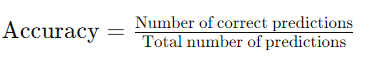

### 2. Confusion Matrix:
The confusion matrix is a more detailed indicator of the model performance, showing how predictions were distributed across the actual classes. The matrix you provided is:

```
array([[3, 0, 0],
       [0, 8, 0],
       [0, 1, 3]], dtype=int64)
```

This matrix can be broken down as follows assuming it is for a three-class classification problem:

- **Rows**: Each row of the matrix corresponds to the true class labels (actual categories).
- **Columns**: Each column represents the predicted class labels by the model.

Given your matrix:

- **First row**: `[3, 0, 0]` means there were 3 instances of class 0 and all were correctly predicted as class 0 (no misclassifications).
- **Second row**: `[0, 8, 0]` indicates there were 8 instances of class 1, and all were correctly predicted as class 1.
- **Third row**: `[0, 1, 3]` signifies there were 4 instances of class 2, out of which 1 was incorrectly predicted as class 1, and 3 were correctly predicted as class 2.

### Detailed Interpretation:
- **True Positives (TP)** for each class are the diagonal elements: 3 for class 0, 8 for class 1, and 3 for class 2.
- **False Positives (FP)** for each class are the sum of columns for each predicted class, excluding the diagonal element. For example, there is 1 false positive for class 1 (from the third row).
- **False Negatives (FN)** are the sums of rows excluding the diagonal. For class 2, there's 1 false negative (from the third row).
- **False Negatives (FN) for a particular class occur when the actual class is positive, but the model incorrectly predicts it as negative (i.e., predicts it as any other class).**

### Conclusion:
The model is performing well, with high accuracy. Most misclassifications occurred with class 2, where there was 1 instance misclassified as class 1. The rest of the predictions are accurate. This matrix provides a more nuanced view of model performance than just the accuracy score, indicating how well the model is doing for each specific class and highlighting potential areas for improvement (like reducing the misclassifications of class 2).

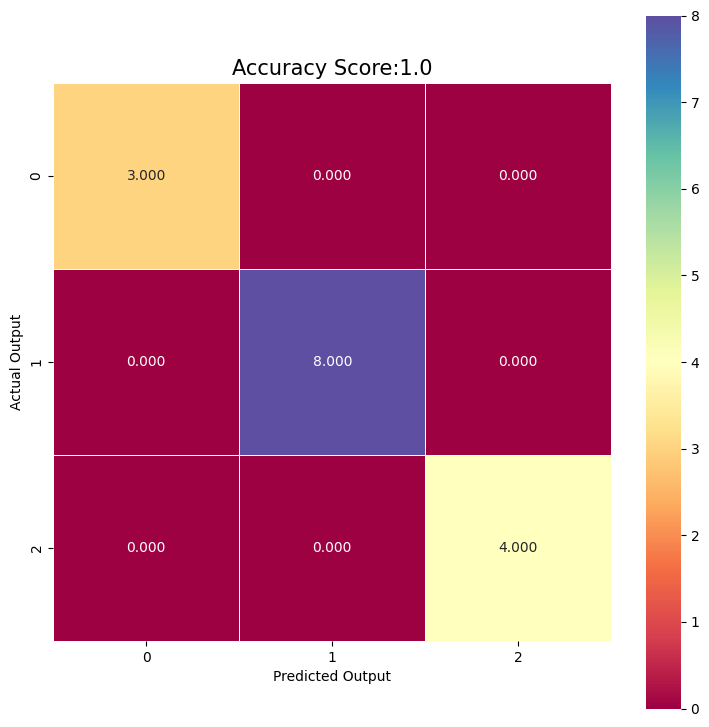

In [55]:
import seaborn as sns
plt.figure(figsize= (9,9))
sns.heatmap(cm, annot=True, fmt= ".3f", linewidths=.5, square= True, cmap= 'Spectral');
plt.ylabel("Actual Output");
plt.xlabel("Predicted Output");
all_sample_title= "Accuracy Score:{0}".format(score)
plt.title(all_sample_title, size= 15);

# Random Forest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(random_state=0)
from sklearn.datasets import make_regression
x, y = make_regression(n_features=4, random_state=0)
model.fit(x,y)
model.predict([[5,4,2,6]])



array([292.5354215])

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test, = train_test_split(x,y,test_size=0.1,random_state=0)  #Always write train first then test

predicted_values= model.predict(x_test)
predicted_values
score=model.score(x_test, y_test)
print("Accuracy score:", score)



Accuracy score: 0.9892223015957305


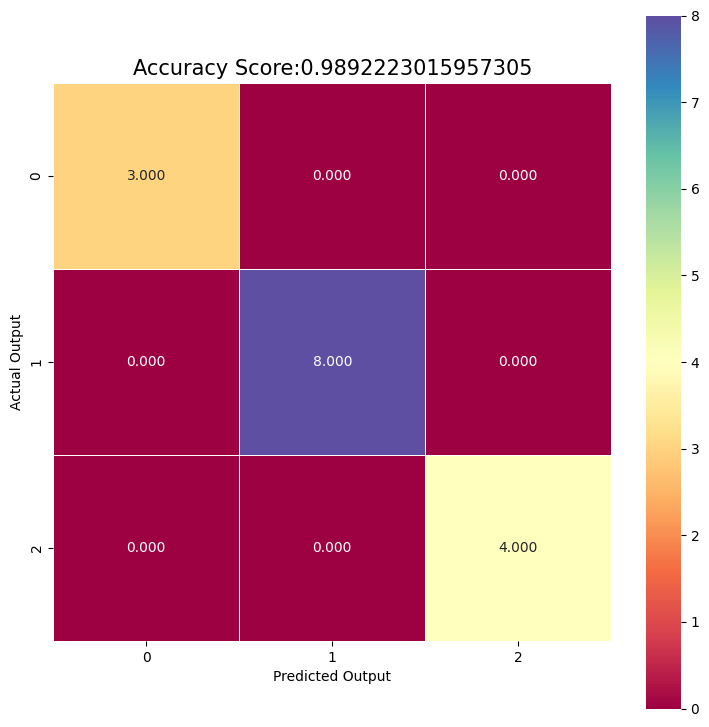

In [58]:
import seaborn as sns
plt.figure(figsize= (9,9))
sns.heatmap(cm, annot=True, fmt= ".3f", linewidths=.5, square= True, cmap= 'Spectral');
plt.ylabel("Actual Output");
plt.xlabel("Predicted Output");
all_sample_title= "Accuracy Score:{0}".format(score)
plt.title(all_sample_title, size= 15);

# K Nearest Neighbor (KNN)

It is commonly used for simple recommendation systems, pattern recognition, data mining, financial market predictions, intrusion detection, 

**Euclidean Distance**
This is nothing but the cartesian distance between the two points which are in the plane/hyperplane. Euclidean distance can also be visualized as the length of the straight line that joins the two points which are into consideration. This metric helps us calculate the net displacement done between the two states of an object.


| Metric                 | Description                                            | Use Case                                      |
|------------------------|--------------------------------------------------------|-----------------------------------------------|
| Accuracy               | The proportion of correct predictions among all        | Overall performance evaluation.               |
|                        | predictions made.                                      |                                               |
| Precision              | The proportion of true positive predictions out of all  | Useful when minimizing false positives is     |
|                        | positive predictions (true positives / true positives  | crucial, such as in medical diagnosis.       |
|                        | + false positives).                                    |                                               |
| Recall (Sensitivity)   | The proportion of true positive predictions out of all  | Useful when minimizing false negatives is     |
|                        | actual positives (true positives / true positives +    | crucial, such as in spam detection.          |
|                        | false negatives).                                      |                                               |
| F1 Score               | The harmonic mean of precision and recall, providing   | A balanced measure when both precision and    |
|                        | a single metric that considers both false positives   | recall are important, such as in information  |
|                        | and false negatives.                                   | retrieval systems.                           |
| ROC AUC Score          | Area under the Receiver Operating Characteristic      | Useful for binary classification problems,   |
|                        | (ROC) curve, which plots the true positive rate       | especially when the class distribution is    |
|                        | against the false positive rate. AUC measures the      | imbalanced.                                  |
|                        | ability of the model to distinguish between positive  |                                               |
|                        | and negative classes.                                  |                                               |
| Confusion Matrix       | A table representing the performance of a classification| Provides a detailed breakdown of true       |
|                        | algorithm, showing correct and incorrect predictions. | positives, true negatives, false positives,  |
|                        | It is often used in conjunction with other metrics.   | and false negatives.                        |


In [59]:
import pandas as pd
import numpy as np
import seaborn as sns


In [60]:
df=df=pd.read_csv(r"datasets\ML_likelines_CSV.csv")
df.head()

,age,height,weight,gender,likeness
0,27,170.688,76.0,Male,Biryani
1,41,165.000,70.0,Male,Biryani
2,29,171.000,80.0,Male,Biryani
3,27,173.000,102.0,Male,Biryani
4,29,164.000,67.0,Male,Biryani


In [61]:
df["gender"]=df["gender"].replace('Male',1)
df["gender"]=df["gender"].replace('Female',0)
df.head()

,age,height,weight,gender,likeness
0,27,170.688,76.0,1,Biryani
1,41,165.000,70.0,1,Biryani
2,29,171.000,80.0,1,Biryani
3,27,173.000,102.0,1,Biryani
4,29,164.000,67.0,1,Biryani


In [62]:
x=df[['age','height','weight','gender']]
y=df['likeness']

In [63]:
from sklearn.neighbors import KNeighborsClassifier

#create and fit model

model= KNeighborsClassifier(n_neighbors=5).fit(x,y)

#prediction
predict=model.predict([[27,160,70,1]])    #70=weight, 1=gender
predict

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Biryani'], dtype=object)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test, y_train, y_test, = train_test_split(x,y,test_size=0.2,random_state=0)  #Always write train first then test

#creating model
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)

predicted_values= model.predict(x_test)
predicted_values

array(['Biryani', 'Samosa', 'Biryani', 'Biryani', 'Biryani', 'Biryani',
       'Biryani', 'Biryani', 'Biryani', 'Biryani', 'Samosa', 'Biryani',
       'Samosa', 'Biryani', 'Biryani', 'Biryani', 'Biryani', 'Biryani',
       'Biryani', 'Biryani', 'Biryani', 'Biryani', 'Biryani', 'Biryani',
       'Biryani', 'Biryani', 'Biryani', 'Samosa', 'Biryani', 'Samosa',
       'Biryani', 'Biryani', 'Biryani', 'Biryani', 'Biryani', 'Samosa',
       'Samosa', 'Biryani', 'Biryani', 'Biryani', 'Biryani', 'Samosa',
       'Pakora', 'Biryani', 'Biryani', 'Biryani', 'Biryani', 'Biryani',
       'Biryani'], dtype=object)

In [65]:
score=accuracy_score(y_test , predicted_values)
score

0.5714285714285714

In above code accuracy score is changing with changing n-neihbour value. The data is more inclined to biryani since more in number. It can be treated by data wrangling

# Naive- Bayes Model


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [67]:
#dataset
import seaborn as sns
phool= sns.load_dataset("iris")
phool.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [68]:
X=phool.iloc[:, :-1]   # feature
y=phool.iloc[:, -1:]   # labels

easiest naive Bayes classifier to understand is Gaussian naive Bayes. In
this classifier, the assumption is that data from each label is drawn from a simple Gaus‐
sian distribution.

In [69]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB().fit(X, y)
model




c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [70]:
# train_test split

from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test, = train_test_split(X,y,test_size=0.2,random_state=0)  #Always write train first then test


In [71]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB().fit(x_train, y_train)
model
# Prediction

y_pred= model.predict(x_test)
y_pred

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa'], dtype='<U10')

In [72]:
from sklearn import metrics
score=metrics.accuracy_score(y_test , y_pred)
score
print(score,"and percentage is= ", score*100,"%")

0.9666666666666667 and percentage is=  96.66666666666667 %


In [73]:
# confusion matrix
from sklearn import metrics
cm= metrics.confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]], dtype=int64)

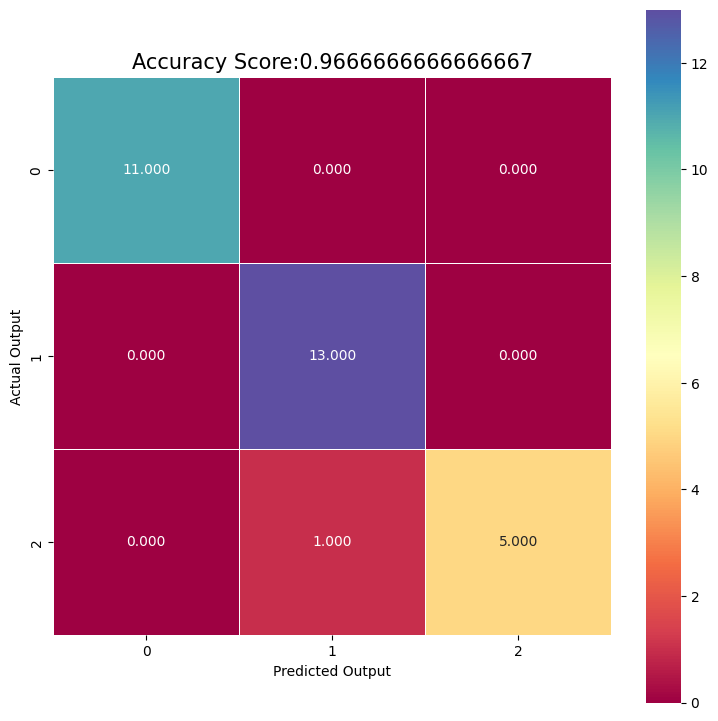

In [74]:
import seaborn as sns
plt.figure(figsize= (9,9))
sns.heatmap(cm, annot=True, fmt= ".3f", linewidths=.5, square= True, cmap= 'Spectral');
plt.ylabel("Actual Output");
plt.xlabel("Predicted Output");
all_sample_title= "Accuracy Score:{0}".format(score)
plt.title(all_sample_title, size= 15);

Now let’s generate some new data and predict the label:

In[4]: rng = np.random.RandomState(0)
 Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
 ynew = model.predict(Xnew)
Now we can plot this new data to get an idea of where the decision boundary is
(Figure 5-40):
In[5]: plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
 lim = plt.axis()
 plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
 plt.axis(lim);

# Support Vector Machines (SVM)


# Key Points

1. **Classification Task**:
   - SVMs are used to classify objects into two or more categories.
   - Examples: distinguishing between a dog or cat in an image, predicting stock prices.

2. **Representation**:
   - Objects are represented as points in an n-dimensional space.
   - The coordinates of these points are known as features.

3. **Hyperplane**:
   - SVMs classify objects by drawing a hyperplane that separates different categories.
   - In 2D, this is a line; in 3D, it is a plane.
   - The goal is to place the hyperplane so that all points of one category are on one side and the points of the other category are on the other side.

4. **Margin**:
   - SVM seeks the hyperplane that maximizes the distance (margin) to the nearest points of each category.
   - The points on the margin are called support vectors.

5. **Training Set**:
   - SVM requires a labeled training set to determine the hyperplane.
   - It is a supervised learning algorithm.

6. **Optimization**:
   - SVM solves a convex optimization problem to maximize the margin while ensuring points are correctly categorized.

7. **Implementation**:
   - Using SVM involves loading a library, preparing training data, fitting the model, and predicting new data categories.
   - Example: using Python libraries to implement SVM.

8. **Pros of SVM**:
   - Easy to understand, implement, use, and interpret.
   - Effective with small training data sizes.

9. **Limitations**:
   - SVMs may struggle when points cannot be separated by a hyperplane.
   - This can be mitigated by:
     - Augmenting data with nonlinear features.
     - Finding the hyperplane in a higher-dimensional space.
     - Projecting back to the original space using the kernel trick.

10. **Applications**:
    - Face detection, spam filtering, and text recognition.


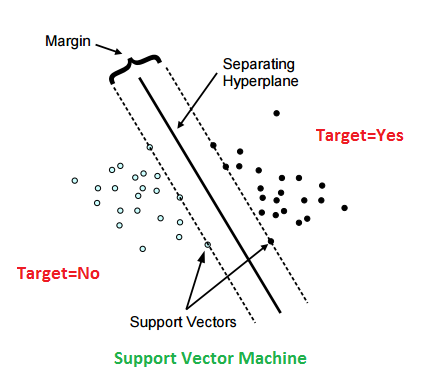

ImportError: cannot import name 'get_dataset_names' from 'sklearn.datasets' (c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\datasets\__init__.py)

In [75]:
from sklearn import datasets
cancer=datasets.load_breast_cancer()

In [91]:
import sklearn.datasets as datasets

all_attributes = dir(datasets)
dataset_names = [attr for attr in all_attributes if attr.startswith("load_")]

print("Available built-in datasets:")
for name in dataset_names:
    print(name)

print("\nTotal number of available datasets:", len(dataset_names))

Available built-in datasets:
load_breast_cancer
load_diabetes
load_digits
load_files
load_iris
load_linnerud
load_sample_image
load_sample_images
load_svmlight_file
load_svmlight_files
load_wine

Total number of available datasets: 11


In [76]:
#print name of 13 features
print("Features:", cancer.feature_names)

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [77]:
#print name of labels
print("labels:", cancer.target_names) # 0 for malignant, 1= benign

labels: ['malignant' 'benign']


In [78]:
# features shape
cancer.data.shape

(569, 30)

In [79]:
print(cancer.data[0:5]) # top 5 records from all columns

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [80]:
# train_test split

from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test, = train_test_split(cancer.data,cancer.target,test_size=0.2,random_state=0)  #Always write train first then test


In [81]:
from sklearn.svm import SVC # "Support vector classifier"
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)


SVC(kernel='linear')

In [82]:
#predict response of test dataset

y_pred= clf.predict(x_test)


In [83]:
from sklearn import metrics
score=metrics.accuracy_score(y_test , y_pred)
score
print(score,"and percentage is= ", score*100,"%")

0.956140350877193 and percentage is=  95.6140350877193 %


In [84]:
score=metrics.precision_score(y_test , y_pred)
score
print("precision_score", score,"and percentage is= ", score*100,"%")

precision_score 0.984375 and percentage is=  98.4375 %


In [85]:
score=metrics.recall_score(y_test , y_pred)
score
print("recall_score", score,"and percentage is= ", score*100,"%")

recall_score 0.9402985074626866 and percentage is=  94.02985074626866 %


In [86]:
# confusion matrix
from sklearn import metrics
cm= metrics.confusion_matrix(y_test, y_pred)
cm

array([[46,  1],
       [ 4, 63]], dtype=int64)

Text(0.5, 1.0, 'SVM model Accuracy in %:94.02985074626866')

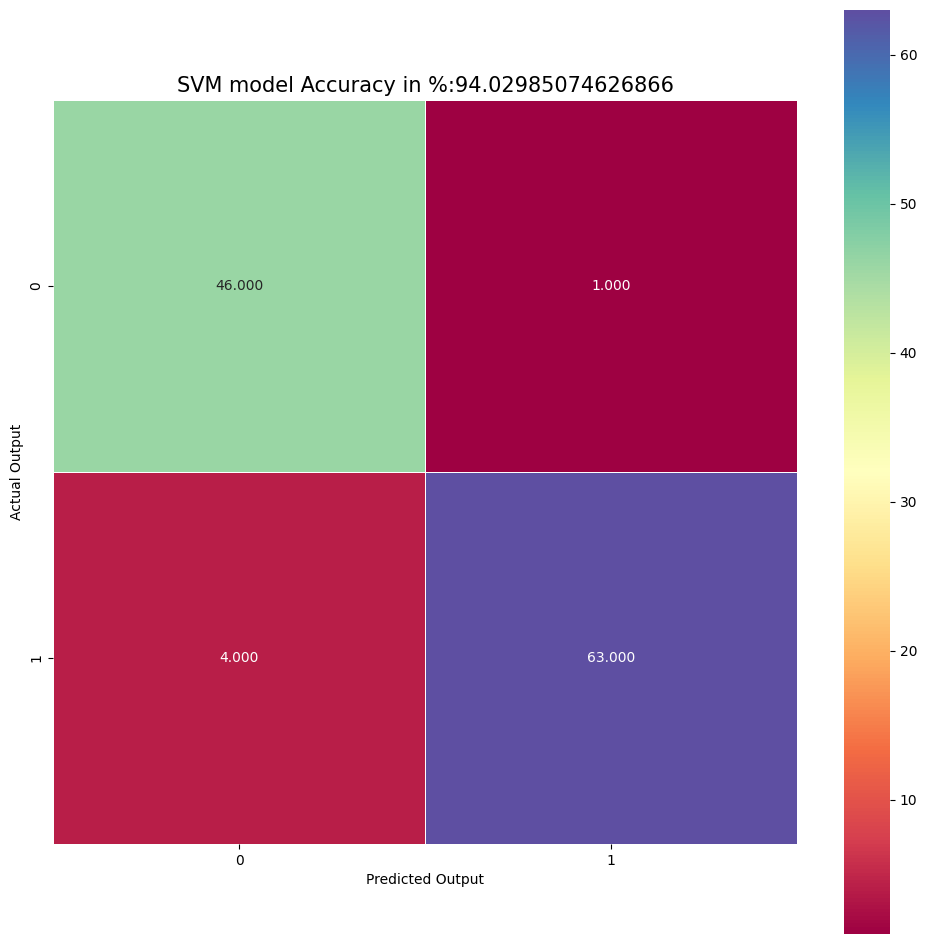

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (12,12))
sns.heatmap(cm, annot=True, fmt= ".3f", linewidths=.5, square= True, cmap= 'Spectral')
plt.ylabel("Actual Output")
plt.xlabel("Predicted Output")
all_sample_title= "SVM model Accuracy in %:{0}".format(score*100)
plt.title(all_sample_title, size= 15)